In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
import numpy as np
import pandas as pd 

In [4]:
import sys
sys.path.append('../../../')

In [5]:
import matplotlib.pyplot as plt 

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [7]:
from src.utils.dates import get_nyse_business_dates

In [8]:
from research.metrics import get_features_responses_correlation
from research.plots import plot_bin_summary_of_xy

In [9]:
from src.settings import Settings

In [10]:
from src.utils.io.read import PreprocessedDataReader

In [11]:
from src.preprocessing.base import FutureTicker

In [12]:
pdr = PreprocessedDataReader(Settings.historical.paths.PREPROCESSED_DATA_PATH)                    

In [13]:
dataset = pdr.read_dataset(ticker=FutureTicker.BRENT)

In [14]:
dataset.shape

(757, 81)

In [15]:
dataset.tail(2)

,tradeDate,Name,Commercial_NetPosition,CommercialLongPosition,CommercialShortPosition,ManagedMoney_NetPosition,ManagedMoney_LongPosition,ManagedMoney_ShortPosition,Commercial_NetPosition_change,prior_report_Commercial_NetPosition_change,...,prior_cumulative_5D_F2_Volume_change,next_prior_cumulative_5D_F2_Volume_change,prior_cumulative_5D_F1MinusF2_Volume_change,next_prior_cumulative_5D_F1MinusF2_Volume_change,F1_RolledPrice_change,next_F1_RolledPrice_change,F2_RolledPrice_change,next_F2_RolledPrice_change,F3_RolledPrice_change,next_F3_RolledPrice_change
755,2025-06-24,CO,-432876.0,1189626.0,1622502.0,-6746.0,498013.0,504759.0,39743.0,-73318.0,...,-53127.0,-1301754.0,-766204.0,-726115.0,-9.31,0.94,-8.73,0.94,-8.32,0.85
756,2025-07-01,CO,-427357.0,1092550.0,1519907.0,-8225.0,475395.0,483620.0,5519.0,39743.0,...,-1301754.0,NaN,-726115.0,NaN,0.94,NaN,0.94,NaN,0.85,NaN


In [16]:
dataset.columns.tolist()

['tradeDate',
 'Name',
 'Commercial_NetPosition',
 'CommercialLongPosition',
 'CommercialShortPosition',
 'ManagedMoney_NetPosition',
 'ManagedMoney_LongPosition',
 'ManagedMoney_ShortPosition',
 'Commercial_NetPosition_change',
 'prior_report_Commercial_NetPosition_change',
 'forward_report_Commercial_NetPosition_change',
 'CommercialLongPosition_change',
 'prior_report_CommercialLongPosition_change',
 'forward_report_CommercialLongPosition_change',
 'CommercialShortPosition_change',
 'prior_report_CommercialShortPosition_change',
 'forward_report_CommercialShortPosition_change',
 'ManagedMoney_NetPosition_change',
 'prior_report_ManagedMoney_NetPosition_change',
 'forward_report_ManagedMoney_NetPosition_change',
 'ManagedMoney_LongPosition_change',
 'prior_report_ManagedMoney_LongPosition_change',
 'forward_report_ManagedMoney_LongPosition_change',
 'ManagedMoney_ShortPosition_change',
 'prior_report_ManagedMoney_ShortPosition_change',
 'forward_report_ManagedMoney_ShortPosition_chan

In [17]:
dataset['Commercial_NetPosition'].describe()

count       757.000000
mean    -406194.019815
std      202484.353988
min     -949089.000000
25%     -561322.000000
50%     -353317.000000
75%     -260809.000000
max      -16110.000000
Name: Commercial_NetPosition, dtype: float64

In [18]:
dataset['ManagedMoney_NetPosition'].describe()

count       757.000000
mean      91411.809775
std      132752.740601
min     -294812.000000
25%        7527.000000
50%       75283.000000
75%      151150.000000
max      508872.000000
Name: ManagedMoney_NetPosition, dtype: float64

In [19]:
np.sum(dataset['ManagedMoney_LongPosition'] <= dataset['ManagedMoney_ShortPosition'])

np.int64(178)

In [20]:
dataset['tradeDate'] = pd.to_datetime(dataset['tradeDate']).dt.date

In [21]:
dataset.sort_values(by = 'tradeDate', ascending = True, inplace=True)

In [22]:
dataset.columns.tolist()

['tradeDate',
 'Name',
 'Commercial_NetPosition',
 'CommercialLongPosition',
 'CommercialShortPosition',
 'ManagedMoney_NetPosition',
 'ManagedMoney_LongPosition',
 'ManagedMoney_ShortPosition',
 'Commercial_NetPosition_change',
 'prior_report_Commercial_NetPosition_change',
 'forward_report_Commercial_NetPosition_change',
 'CommercialLongPosition_change',
 'prior_report_CommercialLongPosition_change',
 'forward_report_CommercialLongPosition_change',
 'CommercialShortPosition_change',
 'prior_report_CommercialShortPosition_change',
 'forward_report_CommercialShortPosition_change',
 'ManagedMoney_NetPosition_change',
 'prior_report_ManagedMoney_NetPosition_change',
 'forward_report_ManagedMoney_NetPosition_change',
 'ManagedMoney_LongPosition_change',
 'prior_report_ManagedMoney_LongPosition_change',
 'forward_report_ManagedMoney_LongPosition_change',
 'ManagedMoney_ShortPosition_change',
 'prior_report_ManagedMoney_ShortPosition_change',
 'forward_report_ManagedMoney_ShortPosition_chan

In [23]:
from research.model_selection.CombinatorialPurgedCV import CombinatorialPurgedCV
from research.model_selection.CombinatorialPurgedCV import cpcv_predict



In [24]:

from sklearn.linear_model import LinearRegression, ElasticNetCV
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor


In [25]:
?CombinatorialPurgedCV

Init signature: CombinatorialPurgedCV(n_partitions: int, k: int, purge_amount: int)
Docstring:     
Combinatorial Purged Cross-Validatpr with Purging

This class identifies training and testing indicies that split the data into train/test sets. It also implements purging to avoid lookahead bias.
Init docstring:
Args:
:param n_partitions: the total number of partitions
:param k: the number of partitions to include in the test set
:param purge_amount: the number of indices to be purged between train/test sets
File:           ~/Documents/Projects/omroot_repos/COTAME/research/model_selection/CombinatorialPurgedCV.py
Type:           type
Subclasses:     

In [26]:
response_names =  ['forward_Commercial_NetPosition_to_openinterest_change',
                    'forward_CommercialLongPosition_to_openinterest_change',
                    'forward_CommercialShortPosition_to_openinterest_change'] 



In [27]:
cv = CombinatorialPurgedCV(n_partitions=10,
                           k=2,
                           purge_amount=10)

In [28]:
import json

In [29]:
with open("br_cot_comm_forecast_selected_features_by_response.json", "r") as f:
    selected_features_by_response = json.load(f)

In [30]:
selected_features_by_response

{'forward_report_Commercial_NetPosition_change': ['prior_cumulative_5D_F1_Volume_change',
  'prior_5D_AGG_OI_change',
  'prior_5D_F1MinusF2_openinterest_change',
  'prior_report_CommercialShortPosition_to_openinterest_change',
  'prior_cumulative_5D_F2_Volume_change',
  'prior_5D_F2_OI_change'],
 'forward_report_CommercialLongPosition_change': ['prior_report_CommercialShortPosition_change',
  'prior_cumulative_5D_F2_Volume_change',
  'prior_5D_F2_OI_change',
  'prior_cumulative_5D_F1MinusF2_Volume_change',
  'prior_5D_AGG_OI_change',
  'prior_5D_F1_OI_change'],
 'forward_report_CommercialShortPosition_change': ['prior_report_CommercialLongPosition_change',
  'prior_cumulative_5D_F2_Volume_change',
  'prior_5D_F2_OI_change',
  'prior_cumulative_5D_F1_Volume_change',
  'prior_cumulative_5D_F1MinusF2_Volume_change',
  'prior_5D_F1_OI_change'],
 'forward_Commercial_NetPosition_to_openinterest_change': ['prior_report_Commercial_NetPosition_change',
  'F3_RolledPrice_change',
  'prior_report

In [31]:
from src.preprocessing.base import Winsorizer

In [32]:
import numpy as np
import pandas as pd
from scipy.stats.mstats import winsorize
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [33]:
from sklearn.linear_model import SGDRegressor, Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor

estimators_  = {
    # Elastic-net via SGD (fast, online)
    "enet": SGDRegressor(
        penalty="elasticnet",
        alpha=1e-4,
        l1_ratio=0.15,
        loss="squared_error",   # or "huber" for robustness
        max_iter=1000,
        tol=1e-3,
        random_state=42
    ),
    # Classic L1 / OLS / L2
    "lasso": Lasso(alpha=1.0, random_state=42),
    "ols": LinearRegression(),
    "ridge": Ridge(alpha=1.0, random_state=42),

    # Tree-based regressors
    "rf": RandomForestRegressor(n_estimators=250, max_depth=10, random_state=42),
    "extra": ExtraTreesRegressor(n_estimators=250, max_depth=10, random_state=42),
    "hgbm": HistGradientBoostingRegressor(max_iter=150, learning_rate=0.001, random_state=42),
}


In [34]:
from __future__ import annotations
import numpy as np
import optuna
from optuna import pruners
from research.model_selection.evaluation import find_best_model

responses_best_model = {}
responses_best_params = {}
responses_study = {}
responses_best_per_model = {}

for (response_name, feature_names) in selected_features_by_response.items():
    best_model, best_params, study, best_per_model = find_best_model(
                        Xy=dataset,
                        feature_names=feature_names,
                        response_name=response_name,
                        cv=cv,
                        n_trials=80,         # bump this as you like
                        n_jobs_cpcv=10,
                        seed=42
                    )
    responses_best_model[response_name]=best_model
    responses_best_params[response_name]=best_params
    responses_study[response_name]=study
    responses_best_per_model[response_name]=best_per_model
    
    print("Overall Best Params:", best_params)
    print("\nBest Per Model:")
    for model, info in best_per_model.items():
        print(f"{model}: score={info['score']:.4f}, params={info['params']}")

[I 2025-08-20 17:43:46,814] A new study created in memory with name: no-name-7f77f9f0-5bdf-43f7-bdc7-a3005f54dbe0
Best trial: 0. Best value: 0.0757693:   1%|      | 1/80 [00:01<01:43,  1.31s/it]

[I 2025-08-20 17:43:48,128] Trial 0 finished with value: 0.07576926180237281 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: 0.07576926180237281.
[I 2025-08-20 17:43:48,159] Trial 1 finished with value: 0.07566705632491588 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 0 with value: 0.07576926180237281.


Best trial: 2. Best value: 0.0987562:   4%|▏     | 3/80 [00:05<02:13,  1.74s/it]

[I 2025-08-20 17:43:51,901] Trial 2 finished with value: 0.09875624893930732 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.09875624893930732.


Best trial: 3. Best value: 0.139082:  10%|▋      | 8/80 [00:05<00:31,  2.32it/s]

[I 2025-08-20 17:43:52,149] Trial 3 finished with value: 0.13908237740812585 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 3 with value: 0.13908237740812585.
[I 2025-08-20 17:43:52,182] Trial 4 finished with value: 0.07570530900600625 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 3 with value: 0.13908237740812585.
[I 2025-08-20 17:43:52,211] Trial 5 finished with value: 0.07566702048093592 and parameters: {'model': 'ols'}. Best is trial 3 with value: 0.13908237740812585.
[I 2025-08-20 17:43:52,242] Trial 6 finished with value: -0.034657292919351636 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 3 with value: 0.13908237740812585.
[I 2025-08-20 17:43:52,273] Trial 7 finished with value: 0.0756670204809359

Best trial: 3. Best value: 0.139082:  12%|▊     | 10/80 [00:05<00:24,  2.91it/s]

[I 2025-08-20 17:43:52,561] Trial 8 finished with value: 0.10999741695501852 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 3 with value: 0.13908237740812585.
[I 2025-08-20 17:43:52,591] Trial 9 finished with value: 0.07566702048093592 and parameters: {'model': 'ols'}. Best is trial 3 with value: 0.13908237740812585.
[I 2025-08-20 17:43:52,756] Trial 10 finished with value: 0.12323576415029756 and parameters: {'model': 'hgbm', 'learning_rate': 0.19607453433561617, 'max_depth': 3, 'max_iter': 100, 'l2_regularization': 0.9725221759846352, 'max_leaf_nodes': 222}. Best is trial 3 with value: 0.13908237740812585.


Best trial: 3. Best value: 0.139082:  15%|▉     | 12/80 [00:06<00:19,  3.51it/s]

[I 2025-08-20 17:43:52,907] Trial 11 finished with value: 0.12182258067328816 and parameters: {'model': 'hgbm', 'learning_rate': 0.2625571459751379, 'max_depth': 3, 'max_iter': 100, 'l2_regularization': 0.9950382910250604, 'max_leaf_nodes': 242}. Best is trial 3 with value: 0.13908237740812585.


Best trial: 3. Best value: 0.139082:  16%|▉     | 13/80 [00:06<00:20,  3.24it/s]

[I 2025-08-20 17:43:53,319] Trial 12 finished with value: 0.13537730671919065 and parameters: {'model': 'hgbm', 'learning_rate': 0.1872599860333594, 'max_depth': 3, 'max_iter': 300, 'l2_regularization': 0.8967060787971508, 'max_leaf_nodes': 184}. Best is trial 3 with value: 0.13908237740812585.


Best trial: 3. Best value: 0.139082:  18%|█     | 14/80 [00:12<01:34,  1.44s/it]

[I 2025-08-20 17:43:59,061] Trial 13 finished with value: 0.12150883016631729 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 28, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 3 with value: 0.13908237740812585.


Best trial: 3. Best value: 0.139082:  19%|█▏    | 15/80 [00:14<01:42,  1.57s/it]

[I 2025-08-20 17:44:01,086] Trial 14 finished with value: 0.08398033209683783 and parameters: {'model': 'hgbm', 'learning_rate': 0.0015078832504018204, 'max_depth': 8, 'max_iter': 600, 'l2_regularization': 0.658423685658526, 'max_leaf_nodes': 139}. Best is trial 3 with value: 0.13908237740812585.


Best trial: 3. Best value: 0.139082:  20%|█▏    | 16/80 [00:15<01:29,  1.40s/it]

[I 2025-08-20 17:44:01,958] Trial 15 finished with value: 0.13728748998137869 and parameters: {'model': 'hgbm', 'learning_rate': 0.05766711568078508, 'max_depth': 6, 'max_iter': 400, 'l2_regularization': 0.6634064286119825, 'max_leaf_nodes': 162}. Best is trial 3 with value: 0.13908237740812585.


Best trial: 3. Best value: 0.139082:  21%|█▎    | 17/80 [00:16<01:26,  1.37s/it]

[I 2025-08-20 17:44:03,240] Trial 16 finished with value: 0.09583220391522233 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 13, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 3 with value: 0.13908237740812585.


Best trial: 3. Best value: 0.139082:  24%|█▍    | 19/80 [00:20<02:05,  2.06s/it]

[I 2025-08-20 17:44:07,165] Trial 17 finished with value: 0.10585799406179043 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 26, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 3 with value: 0.13908237740812585.
[I 2025-08-20 17:44:07,210] Trial 18 finished with value: 0.08561478835187515 and parameters: {'model': 'enet', 'alpha': 1.5375665479416203e-06, 'l1_ratio': 0.9692698520487181, 'loss': 'squared_error'}. Best is trial 3 with value: 0.13908237740812585.
[I 2025-08-20 17:44:07,256] Trial 19 finished with value: 0.07634192000196321 and parameters: {'model': 'lasso', 'alpha': 7.564898361977755}. Best is trial 3 with value: 0.13908237740812585.


Best trial: 3. Best value: 0.139082:  26%|█▌    | 21/80 [00:22<01:13,  1.25s/it]

[I 2025-08-20 17:44:08,830] Trial 20 finished with value: 0.1335785176251905 and parameters: {'model': 'hgbm', 'learning_rate': 0.029102240186787243, 'max_depth': 6, 'max_iter': 800, 'l2_regularization': 0.5753514566000351, 'max_leaf_nodes': 18}. Best is trial 3 with value: 0.13908237740812585.


Best trial: 3. Best value: 0.139082:  28%|█▋    | 22/80 [00:22<01:06,  1.15s/it]

[I 2025-08-20 17:44:09,564] Trial 21 finished with value: 0.1312503151798728 and parameters: {'model': 'hgbm', 'learning_rate': 0.0779641422449233, 'max_depth': 5, 'max_iter': 400, 'l2_regularization': 0.7269647517880449, 'max_leaf_nodes': 161}. Best is trial 3 with value: 0.13908237740812585.


Best trial: 3. Best value: 0.139082:  29%|█▋    | 23/80 [00:23<01:05,  1.15s/it]

[I 2025-08-20 17:44:10,748] Trial 22 finished with value: 0.13337868268128641 and parameters: {'model': 'hgbm', 'learning_rate': 0.09266629558168286, 'max_depth': 10, 'max_iter': 400, 'l2_regularization': 0.7658864040691098, 'max_leaf_nodes': 178}. Best is trial 3 with value: 0.13908237740812585.


Best trial: 3. Best value: 0.139082:  30%|█▊    | 24/80 [00:24<00:57,  1.02s/it]

[I 2025-08-20 17:44:11,369] Trial 23 finished with value: 0.13549265873645086 and parameters: {'model': 'hgbm', 'learning_rate': 0.08073605677008414, 'max_depth': 5, 'max_iter': 300, 'l2_regularization': 0.43599523990757927, 'max_leaf_nodes': 95}. Best is trial 3 with value: 0.13908237740812585.


Best trial: 3. Best value: 0.139082:  31%|█▉    | 25/80 [00:25<00:56,  1.03s/it]

[I 2025-08-20 17:44:12,403] Trial 24 finished with value: 0.1097417722298427 and parameters: {'model': 'hgbm', 'learning_rate': 0.010760522593487701, 'max_depth': 9, 'max_iter': 300, 'l2_regularization': 0.3684160569957405, 'max_leaf_nodes': 87}. Best is trial 3 with value: 0.13908237740812585.


Best trial: 3. Best value: 0.139082:  32%|█▉    | 26/80 [00:26<00:56,  1.05s/it]

[I 2025-08-20 17:44:13,527] Trial 25 finished with value: 0.13670437412760267 and parameters: {'model': 'hgbm', 'learning_rate': 0.06222626543368112, 'max_depth': 5, 'max_iter': 600, 'l2_regularization': 0.0741546339380279, 'max_leaf_nodes': 95}. Best is trial 3 with value: 0.13908237740812585.


Best trial: 3. Best value: 0.139082:  35%|██    | 28/80 [00:28<01:02,  1.20s/it]

[I 2025-08-20 17:44:15,108] Trial 26 finished with value: 0.12262903453656747 and parameters: {'model': 'hgbm', 'learning_rate': 0.010252354505606095, 'max_depth': 6, 'max_iter': 700, 'l2_regularization': 0.08188115492492543, 'max_leaf_nodes': 112}. Best is trial 3 with value: 0.13908237740812585.
[I 2025-08-20 17:44:15,154] Trial 27 finished with value: 0.06680693374231036 and parameters: {'model': 'ridge', 'alpha': 933.6044419798662}. Best is trial 3 with value: 0.13908237740812585.
[I 2025-08-20 17:44:15,201] Trial 28 finished with value: 0.07566703570356256 and parameters: {'model': 'lasso', 'alpha': 0.00017225928349038876}. Best is trial 3 with value: 0.13908237740812585.


Best trial: 3. Best value: 0.139082:  38%|██▎   | 30/80 [00:29<00:40,  1.23it/s]

[I 2025-08-20 17:44:16,586] Trial 29 finished with value: 0.09728984110637551 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 20, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 3 with value: 0.13908237740812585.
[I 2025-08-20 17:44:16,633] Trial 30 finished with value: 0.05643714451468874 and parameters: {'model': 'enet', 'alpha': 1.0118805022401518e-06, 'l1_ratio': 0.044647688631352045, 'loss': 'huber', 'epsilon': 0.19221454626964704}. Best is trial 3 with value: 0.13908237740812585.


Best trial: 3. Best value: 0.139082:  40%|██▍   | 32/80 [00:30<00:33,  1.42it/s]

[I 2025-08-20 17:44:17,573] Trial 31 finished with value: 0.1338450094321279 and parameters: {'model': 'hgbm', 'learning_rate': 0.06608977509125089, 'max_depth': 5, 'max_iter': 500, 'l2_regularization': 0.48013506776729054, 'max_leaf_nodes': 56}. Best is trial 3 with value: 0.13908237740812585.


Best trial: 3. Best value: 0.139082:  41%|██▍   | 33/80 [00:32<00:43,  1.09it/s]

[I 2025-08-20 17:44:19,351] Trial 32 finished with value: 0.1351100258161189 and parameters: {'model': 'hgbm', 'learning_rate': 0.053435878942573165, 'max_depth': 5, 'max_iter': 1000, 'l2_regularization': 0.028737218602766124, 'max_leaf_nodes': 111}. Best is trial 3 with value: 0.13908237740812585.


Best trial: 3. Best value: 0.139082:  42%|██▌   | 34/80 [00:33<00:40,  1.14it/s]

[I 2025-08-20 17:44:20,100] Trial 33 finished with value: 0.1301301162836122 and parameters: {'model': 'hgbm', 'learning_rate': 0.12036256665918361, 'max_depth': 7, 'max_iter': 300, 'l2_regularization': 0.23508964848874825, 'max_leaf_nodes': 136}. Best is trial 3 with value: 0.13908237740812585.


Best trial: 3. Best value: 0.139082:  45%|██▋   | 36/80 [00:35<00:55,  1.27s/it]

[I 2025-08-20 17:44:22,615] Trial 34 finished with value: 0.09792205334357111 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 11, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 3 with value: 0.13908237740812585.
[I 2025-08-20 17:44:22,648] Trial 35 finished with value: 0.07972274817196365 and parameters: {'model': 'ridge', 'alpha': 334.17207377910296}. Best is trial 3 with value: 0.13908237740812585.
[I 2025-08-20 17:44:22,692] Trial 36 finished with value: 0.07566706788137063 and parameters: {'model': 'lasso', 'alpha': 0.0005363885124748765}. Best is trial 3 with value: 0.13908237740812585.


Best trial: 3. Best value: 0.139082:  48%|██▊   | 38/80 [00:36<00:32,  1.28it/s]

[I 2025-08-20 17:44:23,517] Trial 37 finished with value: 0.11845165161439779 and parameters: {'model': 'hgbm', 'learning_rate': 0.025853367463874514, 'max_depth': 4, 'max_iter': 500, 'l2_regularization': 0.4897421660554526, 'max_leaf_nodes': 68}. Best is trial 3 with value: 0.13908237740812585.


Best trial: 3. Best value: 0.139082:  49%|██▉   | 39/80 [00:40<00:55,  1.35s/it]

[I 2025-08-20 17:44:27,246] Trial 38 finished with value: 0.09759219183014299 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 12, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 3 with value: 0.13908237740812585.
[I 2025-08-20 17:44:27,289] Trial 39 finished with value: 0.07566702048093592 and parameters: {'model': 'ols'}. Best is trial 3 with value: 0.13908237740812585.


Best trial: 3. Best value: 0.139082:  51%|███   | 41/80 [00:40<00:37,  1.03it/s]

[I 2025-08-20 17:44:27,818] Trial 40 finished with value: 0.13188203009571917 and parameters: {'model': 'hgbm', 'learning_rate': 0.056341806008668956, 'max_depth': 7, 'max_iter': 200, 'l2_regularization': 0.6378561522593614, 'max_leaf_nodes': 119}. Best is trial 3 with value: 0.13908237740812585.


Best trial: 3. Best value: 0.139082:  52%|███▏  | 42/80 [00:41<00:34,  1.11it/s]

[I 2025-08-20 17:44:28,448] Trial 41 finished with value: 0.1361831541348495 and parameters: {'model': 'hgbm', 'learning_rate': 0.15987016437067356, 'max_depth': 4, 'max_iter': 300, 'l2_regularization': 0.8344307839288272, 'max_leaf_nodes': 187}. Best is trial 3 with value: 0.13908237740812585.


Best trial: 3. Best value: 0.139082:  54%|███▏  | 43/80 [00:42<00:31,  1.17it/s]

[I 2025-08-20 17:44:29,131] Trial 42 finished with value: 0.1359421840770554 and parameters: {'model': 'hgbm', 'learning_rate': 0.12254379276127267, 'max_depth': 4, 'max_iter': 400, 'l2_regularization': 0.8332225669127942, 'max_leaf_nodes': 161}. Best is trial 3 with value: 0.13908237740812585.


Best trial: 3. Best value: 0.139082:  55%|███▎  | 44/80 [00:43<00:31,  1.13it/s]

[I 2025-08-20 17:44:30,105] Trial 43 finished with value: 0.13872690729588694 and parameters: {'model': 'hgbm', 'learning_rate': 0.1418004750889502, 'max_depth': 4, 'max_iter': 600, 'l2_regularization': 0.7925827112804436, 'max_leaf_nodes': 189}. Best is trial 3 with value: 0.13908237740812585.


Best trial: 44. Best value: 0.140115:  56%|██▊  | 45/80 [00:44<00:31,  1.11it/s]

[I 2025-08-20 17:44:31,067] Trial 44 finished with value: 0.14011467326253416 and parameters: {'model': 'hgbm', 'learning_rate': 0.15529507922389107, 'max_depth': 4, 'max_iter': 600, 'l2_regularization': 0.7933385240745309, 'max_leaf_nodes': 201}. Best is trial 44 with value: 0.14011467326253416.


Best trial: 44. Best value: 0.140115:  61%|███  | 49/80 [00:45<00:16,  1.92it/s]

[I 2025-08-20 17:44:32,592] Trial 45 finished with value: 0.1326559674125365 and parameters: {'model': 'hgbm', 'learning_rate': 0.12869799851454436, 'max_depth': 6, 'max_iter': 700, 'l2_regularization': 0.745873116212705, 'max_leaf_nodes': 210}. Best is trial 44 with value: 0.14011467326253416.
[I 2025-08-20 17:44:32,634] Trial 46 finished with value: 0.07566702048093592 and parameters: {'model': 'ols'}. Best is trial 44 with value: 0.14011467326253416.
[I 2025-08-20 17:44:32,680] Trial 47 finished with value: 0.08246895648329204 and parameters: {'model': 'ridge', 'alpha': 19.189358908436734}. Best is trial 44 with value: 0.14011467326253416.
[I 2025-08-20 17:44:32,726] Trial 48 finished with value: 0.08561483511966629 and parameters: {'model': 'enet', 'alpha': 2.2932604652481472e-05, 'l1_ratio': 0.9080167958637562, 'loss': 'squared_error'}. Best is trial 44 with value: 0.14011467326253416.


Best trial: 44. Best value: 0.140115:  62%|███▏ | 50/80 [00:47<00:22,  1.31it/s]

[I 2025-08-20 17:44:34,433] Trial 49 finished with value: 0.13332653266634586 and parameters: {'model': 'hgbm', 'learning_rate': 0.2560280428086367, 'max_depth': 8, 'max_iter': 600, 'l2_regularization': 0.6642032400062007, 'max_leaf_nodes': 209}. Best is trial 44 with value: 0.14011467326253416.


Best trial: 44. Best value: 0.140115:  64%|███▏ | 51/80 [00:51<00:40,  1.40s/it]

[I 2025-08-20 17:44:38,039] Trial 50 finished with value: 0.11505217500211012 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 17, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 44 with value: 0.14011467326253416.


Best trial: 44. Best value: 0.140115:  65%|███▎ | 52/80 [00:52<00:36,  1.32s/it]

[I 2025-08-20 17:44:39,109] Trial 51 finished with value: 0.1367969765795683 and parameters: {'model': 'hgbm', 'learning_rate': 0.14601978262794066, 'max_depth': 4, 'max_iter': 700, 'l2_regularization': 0.8344143730151784, 'max_leaf_nodes': 186}. Best is trial 44 with value: 0.14011467326253416.


Best trial: 52. Best value: 0.141475:  66%|███▎ | 53/80 [00:53<00:33,  1.25s/it]

[I 2025-08-20 17:44:40,171] Trial 52 finished with value: 0.14147469161457085 and parameters: {'model': 'hgbm', 'learning_rate': 0.11367770684098716, 'max_depth': 4, 'max_iter': 700, 'l2_regularization': 0.8478061633128399, 'max_leaf_nodes': 160}. Best is trial 52 with value: 0.14147469161457085.


Best trial: 52. Best value: 0.141475:  68%|███▍ | 54/80 [00:54<00:32,  1.25s/it]

[I 2025-08-20 17:44:41,391] Trial 53 finished with value: 0.13922005840369728 and parameters: {'model': 'hgbm', 'learning_rate': 0.13257589137127082, 'max_depth': 4, 'max_iter': 800, 'l2_regularization': 0.8617397945921599, 'max_leaf_nodes': 158}. Best is trial 52 with value: 0.14147469161457085.


Best trial: 52. Best value: 0.141475:  69%|███▍ | 55/80 [00:55<00:29,  1.17s/it]

[I 2025-08-20 17:44:42,368] Trial 54 finished with value: 0.13532911389069607 and parameters: {'model': 'hgbm', 'learning_rate': 0.10937809718652193, 'max_depth': 3, 'max_iter': 800, 'l2_regularization': 0.9167880143789052, 'max_leaf_nodes': 157}. Best is trial 52 with value: 0.14147469161457085.


Best trial: 52. Best value: 0.141475:  70%|███▌ | 56/80 [00:56<00:27,  1.13s/it]

[I 2025-08-20 17:44:43,379] Trial 55 finished with value: 0.1403224711278605 and parameters: {'model': 'hgbm', 'learning_rate': 0.2730997409494803, 'max_depth': 3, 'max_iter': 800, 'l2_regularization': 0.7993834429688094, 'max_leaf_nodes': 150}. Best is trial 52 with value: 0.14147469161457085.


Best trial: 52. Best value: 0.141475:  71%|███▌ | 57/80 [00:57<00:25,  1.09s/it]

[I 2025-08-20 17:44:44,397] Trial 56 finished with value: 0.13201384982233746 and parameters: {'model': 'hgbm', 'learning_rate': 0.2655178811631867, 'max_depth': 3, 'max_iter': 800, 'l2_regularization': 0.8045397834465375, 'max_leaf_nodes': 144}. Best is trial 52 with value: 0.14147469161457085.


Best trial: 52. Best value: 0.141475:  72%|███▋ | 58/80 [00:58<00:24,  1.11s/it]

[I 2025-08-20 17:44:45,546] Trial 57 finished with value: 0.14140696009416817 and parameters: {'model': 'hgbm', 'learning_rate': 0.19803131028936993, 'max_depth': 3, 'max_iter': 900, 'l2_regularization': 0.9057281914042365, 'max_leaf_nodes': 202}. Best is trial 52 with value: 0.14147469161457085.


Best trial: 52. Best value: 0.141475:  74%|███▋ | 59/80 [01:01<00:32,  1.53s/it]

[I 2025-08-20 17:44:48,074] Trial 58 finished with value: 0.0946761918108738 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 8, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 52 with value: 0.14147469161457085.


Best trial: 52. Best value: 0.141475:  75%|███▊ | 60/80 [01:02<00:28,  1.42s/it]

[I 2025-08-20 17:44:49,235] Trial 59 finished with value: 0.13845520993941562 and parameters: {'model': 'hgbm', 'learning_rate': 0.29238822653211965, 'max_depth': 3, 'max_iter': 900, 'l2_regularization': 0.9138272118821079, 'max_leaf_nodes': 208}. Best is trial 52 with value: 0.14147469161457085.
[I 2025-08-20 17:44:49,282] Trial 60 finished with value: 0.07566726417968192 and parameters: {'model': 'lasso', 'alpha': 0.002757248252003173}. Best is trial 52 with value: 0.14147469161457085.


Best trial: 52. Best value: 0.141475:  78%|███▉ | 62/80 [01:03<00:19,  1.11s/it]

[I 2025-08-20 17:44:50,717] Trial 61 finished with value: 0.13868655560052845 and parameters: {'model': 'hgbm', 'learning_rate': 0.1889790468839726, 'max_depth': 4, 'max_iter': 900, 'l2_regularization': 0.8688266398653883, 'max_leaf_nodes': 198}. Best is trial 52 with value: 0.14147469161457085.


Best trial: 52. Best value: 0.141475:  79%|███▉ | 63/80 [01:05<00:18,  1.11s/it]

[I 2025-08-20 17:44:51,827] Trial 62 finished with value: 0.1382373584926121 and parameters: {'model': 'hgbm', 'learning_rate': 0.1825930712882872, 'max_depth': 3, 'max_iter': 900, 'l2_regularization': 0.7693973464080748, 'max_leaf_nodes': 173}. Best is trial 52 with value: 0.14147469161457085.


Best trial: 52. Best value: 0.141475:  80%|████ | 64/80 [01:06<00:18,  1.15s/it]

[I 2025-08-20 17:44:53,105] Trial 63 finished with value: 0.13788006482569776 and parameters: {'model': 'hgbm', 'learning_rate': 0.18984823956006117, 'max_depth': 4, 'max_iter': 700, 'l2_regularization': 0.9104648759103506, 'max_leaf_nodes': 148}. Best is trial 52 with value: 0.14147469161457085.


Best trial: 52. Best value: 0.141475:  81%|████ | 65/80 [01:07<00:16,  1.10s/it]

[I 2025-08-20 17:44:54,064] Trial 64 finished with value: 0.1369612246254712 and parameters: {'model': 'hgbm', 'learning_rate': 0.10250131540016294, 'max_depth': 3, 'max_iter': 800, 'l2_regularization': 0.9607655757168445, 'max_leaf_nodes': 233}. Best is trial 52 with value: 0.14147469161457085.


Best trial: 52. Best value: 0.141475:  84%|████▏| 67/80 [01:08<00:15,  1.22s/it]

[I 2025-08-20 17:44:55,595] Trial 65 finished with value: 0.13875486728633257 and parameters: {'model': 'hgbm', 'learning_rate': 0.20477566242636167, 'max_depth': 4, 'max_iter': 1000, 'l2_regularization': 0.7307585530533096, 'max_leaf_nodes': 124}. Best is trial 52 with value: 0.14147469161457085.
[I 2025-08-20 17:44:55,623] Trial 66 finished with value: 0.07566702048093592 and parameters: {'model': 'ols'}. Best is trial 52 with value: 0.14147469161457085.
[I 2025-08-20 17:44:55,660] Trial 67 finished with value: 0.06310286852718615 and parameters: {'model': 'enet', 'alpha': 8.148367709757886e-06, 'l1_ratio': 0.5801520803414412, 'loss': 'huber', 'epsilon': 0.14337254417753625}. Best is trial 52 with value: 0.14147469161457085.


Best trial: 52. Best value: 0.141475:  86%|████▎| 69/80 [01:10<00:08,  1.27it/s]

[I 2025-08-20 17:44:56,885] Trial 68 finished with value: 0.13826669404736697 and parameters: {'model': 'hgbm', 'learning_rate': 0.21637582803505093, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.7166858581350687, 'max_leaf_nodes': 120}. Best is trial 52 with value: 0.14147469161457085.


Best trial: 52. Best value: 0.141475:  88%|████▍| 70/80 [01:13<00:13,  1.37s/it]

[I 2025-08-20 17:45:00,475] Trial 69 finished with value: 0.08347155365134844 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.14147469161457085.


Best trial: 52. Best value: 0.141475:  89%|████▍| 71/80 [01:15<00:12,  1.44s/it]

[I 2025-08-20 17:45:02,162] Trial 70 finished with value: 0.14130917177551486 and parameters: {'model': 'hgbm', 'learning_rate': 0.29411034754159315, 'max_depth': 5, 'max_iter': 900, 'l2_regularization': 0.9696062174521403, 'max_leaf_nodes': 126}. Best is trial 52 with value: 0.14147469161457085.


Best trial: 52. Best value: 0.141475:  90%|████▌| 72/80 [01:17<00:12,  1.50s/it]

[I 2025-08-20 17:45:03,855] Trial 71 finished with value: 0.1373622717879679 and parameters: {'model': 'hgbm', 'learning_rate': 0.23218900747542864, 'max_depth': 5, 'max_iter': 900, 'l2_regularization': 0.9587421736880533, 'max_leaf_nodes': 126}. Best is trial 52 with value: 0.14147469161457085.


Best trial: 72. Best value: 0.141656:  91%|████▌| 73/80 [01:18<00:10,  1.53s/it]

[I 2025-08-20 17:45:05,459] Trial 72 finished with value: 0.14165558287689375 and parameters: {'model': 'hgbm', 'learning_rate': 0.2993687442102926, 'max_depth': 4, 'max_iter': 1000, 'l2_regularization': 0.9984384546214754, 'max_leaf_nodes': 129}. Best is trial 72 with value: 0.14165558287689375.


Best trial: 72. Best value: 0.141656:  92%|████▋| 74/80 [01:20<00:09,  1.62s/it]

[I 2025-08-20 17:45:07,319] Trial 73 finished with value: 0.13558042854719493 and parameters: {'model': 'hgbm', 'learning_rate': 0.29756998867403056, 'max_depth': 5, 'max_iter': 900, 'l2_regularization': 0.9679780450672659, 'max_leaf_nodes': 148}. Best is trial 72 with value: 0.14165558287689375.


Best trial: 72. Best value: 0.141656:  94%|████▋| 75/80 [01:22<00:08,  1.71s/it]

[I 2025-08-20 17:45:09,279] Trial 74 finished with value: 0.13815451824401953 and parameters: {'model': 'hgbm', 'learning_rate': 0.1733257926184899, 'max_depth': 6, 'max_iter': 800, 'l2_regularization': 0.8649040768327603, 'max_leaf_nodes': 169}. Best is trial 72 with value: 0.14165558287689375.


Best trial: 72. Best value: 0.141656:  95%|████▊| 76/80 [01:23<00:06,  1.57s/it]

[I 2025-08-20 17:45:10,498] Trial 75 finished with value: 0.07676889331954462 and parameters: {'model': 'hgbm', 'learning_rate': 0.0013150209380121951, 'max_depth': 3, 'max_iter': 800, 'l2_regularization': 0.997087872138611, 'max_leaf_nodes': 250}. Best is trial 72 with value: 0.14165558287689375.
[I 2025-08-20 17:45:10,541] Trial 76 finished with value: 0.07583128489953338 and parameters: {'model': 'ridge', 'alpha': 0.207711856581649}. Best is trial 72 with value: 0.14165558287689375.


Best trial: 72. Best value: 0.141656:  98%|████▉| 78/80 [01:25<00:02,  1.32s/it]

[I 2025-08-20 17:45:12,514] Trial 77 finished with value: 0.10070972399915591 and parameters: {'model': 'hgbm', 'learning_rate': 0.004391129381467122, 'max_depth': 5, 'max_iter': 900, 'l2_regularization': 0.8819505457018683, 'max_leaf_nodes': 133}. Best is trial 72 with value: 0.14165558287689375.
[I 2025-08-20 17:45:12,559] Trial 78 finished with value: 0.07566723054891573 and parameters: {'model': 'lasso', 'alpha': 0.0023771230562026823}. Best is trial 72 with value: 0.14165558287689375.


Best trial: 72. Best value: 0.141656: 100%|█████| 80/80 [01:27<00:00,  1.09s/it]
[I 2025-08-20 17:45:14,297] A new study created in memory with name: no-name-98d942b7-a5af-46a1-befd-0337421c2466


[I 2025-08-20 17:45:14,290] Trial 79 finished with value: 0.14006354345612568 and parameters: {'model': 'hgbm', 'learning_rate': 0.29329430868574047, 'max_depth': 4, 'max_iter': 1000, 'l2_regularization': 0.9318499616873498, 'max_leaf_nodes': 225}. Best is trial 72 with value: 0.14165558287689375.
Overall Best Params: {'model': 'hgbm', 'learning_rate': 0.2993687442102926, 'max_depth': 4, 'max_iter': 1000, 'l2_regularization': 0.9984384546214754, 'max_leaf_nodes': 129}

Best Per Model:
lasso: score=0.0757, params={'model': 'lasso', 'alpha': 0.00017225928349038876}
ridge: score=0.0668, params={'model': 'ridge', 'alpha': 933.6044419798662}
rf: score=0.0947, params={'model': 'rf', 'n_estimators': 400, 'max_depth': 8, 'min_samples_leaf': 7, 'max_features': 'log2'}
hgbm: score=0.0768, params={'model': 'hgbm', 'learning_rate': 0.0013150209380121951, 'max_depth': 3, 'max_iter': 800, 'l2_regularization': 0.997087872138611, 'max_leaf_nodes': 250}
ols: score=0.0757, params={'model': 'ols'}
enet: 

Best trial: 0. Best value: 0.440853:   1%|       | 1/80 [00:00<00:06, 12.19it/s]

[I 2025-08-20 17:45:14,340] Trial 0 finished with value: 0.44085304198458175 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: 0.44085304198458175.
[I 2025-08-20 17:45:14,380] Trial 1 finished with value: 0.4408519405732099 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 0 with value: 0.44085304198458175.


Best trial: 2. Best value: 0.485086:   4%|▎      | 3/80 [00:03<01:35,  1.25s/it]

[I 2025-08-20 17:45:18,035] Trial 2 finished with value: 0.4850860260681896 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.4850860260681896.


Best trial: 2. Best value: 0.485086:   9%|▌      | 7/80 [00:04<00:30,  2.43it/s]

[I 2025-08-20 17:45:18,308] Trial 3 finished with value: 0.4459111899863276 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.4850860260681896.
[I 2025-08-20 17:45:18,340] Trial 4 finished with value: 0.44085734495538315 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.4850860260681896.
[I 2025-08-20 17:45:18,372] Trial 5 finished with value: 0.44085193551651 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.4850860260681896.
[I 2025-08-20 17:45:18,412] Trial 6 finished with value: 0.39298168060958677 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.4850860260681896.
[I 2025-08-20 17:45:18,452] Trial 7 finished with value: 0.44085193551651 and paramet

Best trial: 2. Best value: 0.485086:  11%|▊      | 9/80 [00:04<00:23,  3.03it/s]

[I 2025-08-20 17:45:18,775] Trial 8 finished with value: 0.47357802306436286 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.4850860260681896.
[I 2025-08-20 17:45:18,804] Trial 9 finished with value: 0.44085193551651 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.4850860260681896.


Best trial: 10. Best value: 0.485091:  14%|▋    | 11/80 [00:08<00:57,  1.21it/s]

[I 2025-08-20 17:45:22,397] Trial 10 finished with value: 0.4850914472931521 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.4850914472931521.


Best trial: 10. Best value: 0.485091:  15%|▊    | 12/80 [00:11<01:32,  1.36s/it]

[I 2025-08-20 17:45:25,976] Trial 11 finished with value: 0.4850914472931521 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.4850914472931521.


Best trial: 10. Best value: 0.485091:  16%|▊    | 13/80 [00:15<02:07,  1.90s/it]

[I 2025-08-20 17:45:29,808] Trial 12 finished with value: 0.4850914472931521 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.4850914472931521.


Best trial: 10. Best value: 0.485091:  18%|▉    | 14/80 [00:17<02:04,  1.89s/it]

[I 2025-08-20 17:45:31,682] Trial 13 finished with value: 0.4753640575033042 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.4850914472931521.


Best trial: 10. Best value: 0.485091:  19%|▉    | 15/80 [00:24<03:25,  3.16s/it]

[I 2025-08-20 17:45:38,607] Trial 14 finished with value: 0.48453489694221086 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 10 with value: 0.4850914472931521.


Best trial: 10. Best value: 0.485091:  20%|█    | 16/80 [00:25<02:56,  2.76s/it]

[I 2025-08-20 17:45:40,230] Trial 15 finished with value: 0.466124981542806 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 22, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 10 with value: 0.4850914472931521.


Best trial: 10. Best value: 0.485091:  22%|█▏   | 18/80 [00:32<03:46,  3.66s/it]

[I 2025-08-20 17:45:46,260] Trial 16 finished with value: 0.481440470366442 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 24, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 10 with value: 0.4850914472931521.
[I 2025-08-20 17:45:46,308] Trial 17 finished with value: 0.4413027597582904 and parameters: {'model': 'enet', 'alpha': 1.1633263858100045e-06, 'l1_ratio': 0.9653379460654555, 'loss': 'squared_error'}. Best is trial 10 with value: 0.4850914472931521.
[I 2025-08-20 17:45:46,352] Trial 18 finished with value: 0.4408594166043461 and parameters: {'model': 'lasso', 'alpha': 9.714586134002047}. Best is trial 10 with value: 0.4850914472931521.


Best trial: 10. Best value: 0.485091:  25%|█▎   | 20/80 [00:32<01:48,  1.82s/it]

[I 2025-08-20 17:45:47,025] Trial 19 finished with value: 0.46418164468968837 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 26, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.4850914472931521.


Best trial: 10. Best value: 0.485091:  26%|█▎   | 21/80 [00:35<01:54,  1.94s/it]

[I 2025-08-20 17:45:49,445] Trial 20 finished with value: 0.4849998500389454 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 17, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 10 with value: 0.4850914472931521.


Best trial: 10. Best value: 0.485091:  28%|█▍   | 22/80 [00:40<02:31,  2.61s/it]

[I 2025-08-20 17:45:54,333] Trial 21 finished with value: 0.48303106424882236 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 30, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 10 with value: 0.4850914472931521.


Best trial: 10. Best value: 0.485091:  29%|█▍   | 23/80 [00:43<02:41,  2.83s/it]

[I 2025-08-20 17:45:57,872] Trial 22 finished with value: 0.4850914472931521 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 29, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.4850914472931521.


Best trial: 10. Best value: 0.485091:  30%|█▌   | 24/80 [00:48<03:09,  3.39s/it]

[I 2025-08-20 17:46:02,837] Trial 23 finished with value: 0.4802904394947266 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 26, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 10 with value: 0.4850914472931521.


Best trial: 10. Best value: 0.485091:  31%|█▌   | 25/80 [00:50<02:51,  3.12s/it]

[I 2025-08-20 17:46:05,242] Trial 24 finished with value: 0.4848927310981434 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 27, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 10 with value: 0.4850914472931521.


Best trial: 10. Best value: 0.485091:  32%|█▋   | 26/80 [00:53<02:40,  2.98s/it]

[I 2025-08-20 17:46:07,850] Trial 25 finished with value: 0.48376488483901153 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 18, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.4850914472931521.


Best trial: 10. Best value: 0.485091:  34%|█▋   | 27/80 [00:58<03:10,  3.59s/it]/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximu

[I 2025-08-20 17:46:12,963] Trial 26 finished with value: 0.4763363329244169 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 12, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 10 with value: 0.4850914472931521.


o improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before converg

[I 2025-08-20 17:46:13,482] Trial 27 finished with value: 0.4031233569197253 and parameters: {'model': 'enet', 'alpha': 7.894103404616828e-05, 'l1_ratio': 0.037369388237146195, 'loss': 'huber', 'epsilon': 0.19255826811040527}. Best is trial 10 with value: 0.4850914472931521.
[I 2025-08-20 17:46:13,527] Trial 28 finished with value: 0.42870493464356163 and parameters: {'model': 'ridge', 'alpha': 442.5093801422389}. Best is trial 10 with value: 0.4850914472931521.
[I 2025-08-20 17:46:13,572] Trial 29 finished with value: 0.44085193638709597 and parameters: {'model': 'lasso', 'alpha': 0.0007305754446019548}. Best is trial 10 with value: 0.4850914472931521.


Best trial: 10. Best value: 0.485091:  39%|█▉   | 31/80 [01:01<01:16,  1.56s/it]

[I 2025-08-20 17:46:15,403] Trial 30 finished with value: 0.4677132794862906 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 21, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 10 with value: 0.4850914472931521.


Best trial: 10. Best value: 0.485091:  40%|██   | 32/80 [01:04<01:36,  2.00s/it]

[I 2025-08-20 17:46:19,077] Trial 31 finished with value: 0.4850914472931521 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.4850914472931521.


Best trial: 10. Best value: 0.485091:  41%|██   | 33/80 [01:08<01:52,  2.39s/it]

[I 2025-08-20 17:46:22,772] Trial 32 finished with value: 0.48364382806013934 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 10 with value: 0.4850914472931521.


Best trial: 10. Best value: 0.485091:  42%|██▏  | 34/80 [01:10<01:49,  2.39s/it]

[I 2025-08-20 17:46:25,148] Trial 33 finished with value: 0.4848927310981434 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 28, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 10 with value: 0.4850914472931521.


Best trial: 34. Best value: 0.486645:  44%|██▏  | 35/80 [01:12<01:36,  2.15s/it]

[I 2025-08-20 17:46:26,640] Trial 34 finished with value: 0.486645285415109 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 34 with value: 0.486645285415109.


Best trial: 34. Best value: 0.486645:  45%|██▎  | 36/80 [01:14<01:34,  2.14s/it]

[I 2025-08-20 17:46:28,762] Trial 35 finished with value: 0.4823784212173323 and parameters: {'model': 'hgbm', 'learning_rate': 0.001178109274707556, 'max_depth': 4, 'max_iter': 1000, 'l2_regularization': 0.018312198090511655, 'max_leaf_nodes': 250}. Best is trial 34 with value: 0.486645285415109.


Best trial: 34. Best value: 0.486645:  46%|██▎  | 37/80 [01:15<01:21,  1.90s/it]

[I 2025-08-20 17:46:30,038] Trial 36 finished with value: 0.48522151168676675 and parameters: {'model': 'hgbm', 'learning_rate': 0.0021117159729040044, 'max_depth': 3, 'max_iter': 900, 'l2_regularization': 0.02287437210526344, 'max_leaf_nodes': 255}. Best is trial 34 with value: 0.486645285415109.


Best trial: 34. Best value: 0.486645:  48%|██▍  | 38/80 [01:17<01:13,  1.75s/it]

[I 2025-08-20 17:46:31,402] Trial 37 finished with value: 0.4854886073880427 and parameters: {'model': 'hgbm', 'learning_rate': 0.0019427380716375735, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.013279424663422464, 'max_leaf_nodes': 255}. Best is trial 34 with value: 0.486645285415109.


Best trial: 34. Best value: 0.486645:  49%|██▍  | 39/80 [01:18<01:07,  1.63s/it]

[I 2025-08-20 17:46:32,758] Trial 38 finished with value: 0.4860243022872948 and parameters: {'model': 'hgbm', 'learning_rate': 0.002084639913588959, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.03568169003765349, 'max_leaf_nodes': 242}. Best is trial 34 with value: 0.486645285415109.


Best trial: 34. Best value: 0.486645:  50%|██▌  | 40/80 [01:19<01:02,  1.56s/it]

[I 2025-08-20 17:46:34,130] Trial 39 finished with value: 0.4854340858586789 and parameters: {'model': 'hgbm', 'learning_rate': 0.0019395161216235433, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.0017718642582345082, 'max_leaf_nodes': 252}. Best is trial 34 with value: 0.486645285415109.


Best trial: 34. Best value: 0.486645:  51%|██▌  | 41/80 [01:22<01:08,  1.76s/it]

[I 2025-08-20 17:46:36,364] Trial 40 finished with value: 0.48059067445485343 and parameters: {'model': 'hgbm', 'learning_rate': 0.003554938287831037, 'max_depth': 5, 'max_iter': 1000, 'l2_regularization': 0.002073891811105507, 'max_leaf_nodes': 250}. Best is trial 34 with value: 0.486645285415109.


Best trial: 34. Best value: 0.486645:  52%|██▋  | 42/80 [01:23<01:02,  1.64s/it]

[I 2025-08-20 17:46:37,711] Trial 41 finished with value: 0.48662582380366126 and parameters: {'model': 'hgbm', 'learning_rate': 0.0025208896880755177, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.016297719610668258, 'max_leaf_nodes': 251}. Best is trial 34 with value: 0.486645285415109.


Best trial: 34. Best value: 0.486645:  54%|██▋  | 43/80 [01:24<00:56,  1.54s/it]

[I 2025-08-20 17:46:39,010] Trial 42 finished with value: 0.4861554080882086 and parameters: {'model': 'hgbm', 'learning_rate': 0.003597231210152182, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.008308054783947218, 'max_leaf_nodes': 252}. Best is trial 34 with value: 0.486645285415109.


Best trial: 34. Best value: 0.486645:  55%|██▊  | 44/80 [01:26<00:56,  1.57s/it]

[I 2025-08-20 17:46:40,648] Trial 43 finished with value: 0.47730653375841076 and parameters: {'model': 'hgbm', 'learning_rate': 0.005964392678859678, 'max_depth': 5, 'max_iter': 800, 'l2_regularization': 0.19097257230425793, 'max_leaf_nodes': 200}. Best is trial 34 with value: 0.486645285415109.


Best trial: 34. Best value: 0.486645:  56%|██▊  | 45/80 [01:27<00:55,  1.59s/it]

[I 2025-08-20 17:46:42,288] Trial 44 finished with value: 0.47958322700860484 and parameters: {'model': 'hgbm', 'learning_rate': 0.005557627146400123, 'max_depth': 4, 'max_iter': 1000, 'l2_regularization': 0.17852679402147376, 'max_leaf_nodes': 203}. Best is trial 34 with value: 0.486645285415109.


Best trial: 34. Best value: 0.486645:  57%|██▉  | 46/80 [01:29<00:51,  1.52s/it]

[I 2025-08-20 17:46:43,633] Trial 45 finished with value: 0.48519546267625197 and parameters: {'model': 'hgbm', 'learning_rate': 0.0026874386788451345, 'max_depth': 4, 'max_iter': 700, 'l2_regularization': 0.15691920047309196, 'max_leaf_nodes': 207}. Best is trial 34 with value: 0.486645285415109.


Best trial: 34. Best value: 0.486645:  59%|██▉  | 47/80 [01:31<00:55,  1.67s/it]

[I 2025-08-20 17:46:45,680] Trial 46 finished with value: 0.47392109095645085 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011344288085897946, 'max_depth': 5, 'max_iter': 800, 'l2_regularization': 0.125265910060912, 'max_leaf_nodes': 221}. Best is trial 34 with value: 0.486645285415109.


Best trial: 34. Best value: 0.486645:  60%|███  | 48/80 [01:33<01:01,  1.91s/it]

[I 2025-08-20 17:46:48,136] Trial 47 finished with value: 0.4473689065419021 and parameters: {'model': 'hgbm', 'learning_rate': 0.009321782573521767, 'max_depth': 7, 'max_iter': 1000, 'l2_regularization': 0.009293033721588375, 'max_leaf_nodes': 227}. Best is trial 34 with value: 0.486645285415109.


Best trial: 34. Best value: 0.486645:  61%|███  | 49/80 [01:34<00:46,  1.50s/it]

[I 2025-08-20 17:46:48,697] Trial 48 finished with value: 0.4797270779945325 and parameters: {'model': 'hgbm', 'learning_rate': 0.00299833458054593, 'max_depth': 3, 'max_iter': 400, 'l2_regularization': 0.38927310168710577, 'max_leaf_nodes': 163}. Best is trial 34 with value: 0.486645285415109.
[I 2025-08-20 17:46:48,728] Trial 49 finished with value: 0.44085193551651 and parameters: {'model': 'ols'}. Best is trial 34 with value: 0.486645285415109.


Best trial: 34. Best value: 0.486645:  64%|███▏ | 51/80 [01:37<00:41,  1.43s/it]

[I 2025-08-20 17:46:51,378] Trial 50 finished with value: 0.47512729036610885 and parameters: {'model': 'hgbm', 'learning_rate': 0.0018363902903011948, 'max_depth': 6, 'max_iter': 900, 'l2_regularization': 0.884866628300073, 'max_leaf_nodes': 42}. Best is trial 34 with value: 0.486645285415109.


Best trial: 34. Best value: 0.486645:  65%|███▎ | 52/80 [01:38<00:39,  1.41s/it]

[I 2025-08-20 17:46:52,738] Trial 51 finished with value: 0.48635454435625575 and parameters: {'model': 'hgbm', 'learning_rate': 0.0022846908772272767, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.009227692064711685, 'max_leaf_nodes': 255}. Best is trial 34 with value: 0.486645285415109.


Best trial: 34. Best value: 0.486645:  66%|███▎ | 53/80 [01:39<00:36,  1.35s/it]

[I 2025-08-20 17:46:53,928] Trial 52 finished with value: 0.48633656872508907 and parameters: {'model': 'hgbm', 'learning_rate': 0.003938265584108523, 'max_depth': 3, 'max_iter': 900, 'l2_regularization': 0.10431366913868818, 'max_leaf_nodes': 233}. Best is trial 34 with value: 0.486645285415109.


Best trial: 34. Best value: 0.486645:  68%|███▍ | 54/80 [01:41<00:36,  1.40s/it]

[I 2025-08-20 17:46:55,453] Trial 53 finished with value: 0.4837549362996046 and parameters: {'model': 'hgbm', 'learning_rate': 0.0046396358342593895, 'max_depth': 4, 'max_iter': 900, 'l2_regularization': 0.134998675415354, 'max_leaf_nodes': 227}. Best is trial 34 with value: 0.486645285415109.
[I 2025-08-20 17:46:55,485] Trial 54 finished with value: 0.4357875597912513 and parameters: {'model': 'ridge', 'alpha': 222.49952313298738}. Best is trial 34 with value: 0.486645285415109.


Best trial: 34. Best value: 0.486645:  70%|███▌ | 56/80 [01:43<00:33,  1.38s/it]

[I 2025-08-20 17:46:58,139] Trial 55 finished with value: 0.4333527606480284 and parameters: {'model': 'hgbm', 'learning_rate': 0.013755998634906487, 'max_depth': 9, 'max_iter': 900, 'l2_regularization': 0.12148827172525457, 'max_leaf_nodes': 234}. Best is trial 34 with value: 0.486645285415109.


Best trial: 34. Best value: 0.486645:  71%|███▌ | 57/80 [01:45<00:31,  1.35s/it]

[I 2025-08-20 17:46:59,411] Trial 56 finished with value: 0.4865231458574928 and parameters: {'model': 'hgbm', 'learning_rate': 0.003514711647692703, 'max_depth': 3, 'max_iter': 900, 'l2_regularization': 0.10033038442541857, 'max_leaf_nodes': 229}. Best is trial 34 with value: 0.486645285415109.


Best trial: 34. Best value: 0.486645:  76%|███▊ | 61/80 [01:46<00:12,  1.48it/s]

[I 2025-08-20 17:47:00,836] Trial 57 finished with value: 0.4856525369321753 and parameters: {'model': 'hgbm', 'learning_rate': 0.004435986802219324, 'max_depth': 4, 'max_iter': 800, 'l2_regularization': 0.26271392237962204, 'max_leaf_nodes': 178}. Best is trial 34 with value: 0.486645285415109.
[I 2025-08-20 17:47:00,879] Trial 58 finished with value: 0.44085193551797897 and parameters: {'model': 'lasso', 'alpha': 1.2395590952849827e-06}. Best is trial 34 with value: 0.486645285415109.
[I 2025-08-20 17:47:00,907] Trial 59 finished with value: 0.44085193551651 and parameters: {'model': 'ols'}. Best is trial 34 with value: 0.486645285415109.
[I 2025-08-20 17:47:00,942] Trial 60 finished with value: 0.4413027633853247 and parameters: {'model': 'enet', 'alpha': 8.225792172879086e-06, 'l1_ratio': 0.981854063146382, 'loss': 'squared_error'}. Best is trial 34 with value: 0.486645285415109.


Best trial: 61. Best value: 0.486764:  78%|███▉ | 62/80 [01:47<00:14,  1.24it/s]

[I 2025-08-20 17:47:02,290] Trial 61 finished with value: 0.48676420949591614 and parameters: {'model': 'hgbm', 'learning_rate': 0.002714905573168311, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.09462836525138053, 'max_leaf_nodes': 232}. Best is trial 61 with value: 0.48676420949591614.


Best trial: 61. Best value: 0.486764:  79%|███▉ | 63/80 [01:49<00:15,  1.11it/s]

[I 2025-08-20 17:47:03,511] Trial 62 finished with value: 0.4864969533119789 and parameters: {'model': 'hgbm', 'learning_rate': 0.0033701622175845536, 'max_depth': 3, 'max_iter': 900, 'l2_regularization': 0.11966777569565033, 'max_leaf_nodes': 227}. Best is trial 61 with value: 0.48676420949591614.


Best trial: 61. Best value: 0.486764:  80%|████ | 64/80 [01:50<00:16,  1.03s/it]

[I 2025-08-20 17:47:04,945] Trial 63 finished with value: 0.47470022615891994 and parameters: {'model': 'hgbm', 'learning_rate': 0.007839247793898088, 'max_depth': 4, 'max_iter': 900, 'l2_regularization': 0.11038895879651991, 'max_leaf_nodes': 222}. Best is trial 61 with value: 0.48676420949591614.


Best trial: 61. Best value: 0.486764:  81%|████ | 65/80 [01:52<00:19,  1.30s/it]

[I 2025-08-20 17:47:07,033] Trial 64 finished with value: 0.4814784982898753 and parameters: {'model': 'hgbm', 'learning_rate': 0.0031146828344726742, 'max_depth': 5, 'max_iter': 900, 'l2_regularization': 0.09325631480993367, 'max_leaf_nodes': 223}. Best is trial 61 with value: 0.48676420949591614.


Best trial: 61. Best value: 0.486764:  82%|████▏| 66/80 [01:53<00:16,  1.14s/it]

[I 2025-08-20 17:47:07,749] Trial 65 finished with value: 0.48241959738754886 and parameters: {'model': 'hgbm', 'learning_rate': 0.0030284505758476758, 'max_depth': 3, 'max_iter': 500, 'l2_regularization': 0.0977305446941995, 'max_leaf_nodes': 232}. Best is trial 61 with value: 0.48676420949591614.


Best trial: 61. Best value: 0.486764:  84%|████▏| 67/80 [01:57<00:25,  1.94s/it]

[I 2025-08-20 17:47:11,789] Trial 66 finished with value: 0.46354605694335566 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 61 with value: 0.48676420949591614.
[I 2025-08-20 17:47:11,820] Trial 67 finished with value: 0.4408525105271989 and parameters: {'model': 'ridge', 'alpha': 0.005087701929680542}. Best is trial 61 with value: 0.48676420949591614.


Best trial: 61. Best value: 0.486764:  86%|████▎| 69/80 [02:00<00:18,  1.67s/it]

[I 2025-08-20 17:47:14,451] Trial 68 finished with value: 0.4714070462057876 and parameters: {'model': 'hgbm', 'learning_rate': 0.0013473960064405435, 'max_depth': 6, 'max_iter': 800, 'l2_regularization': 0.24762024551502987, 'max_leaf_nodes': 201}. Best is trial 61 with value: 0.48676420949591614.


Best trial: 61. Best value: 0.486764:  88%|████▍| 70/80 [02:03<00:20,  2.04s/it]

[I 2025-08-20 17:47:17,660] Trial 69 finished with value: 0.46435844921398534 and parameters: {'model': 'hgbm', 'learning_rate': 0.00445423085272441, 'max_depth': 11, 'max_iter': 900, 'l2_regularization': 0.08909146115928196, 'max_leaf_nodes': 236}. Best is trial 61 with value: 0.48676420949591614.
[I 2025-08-20 17:47:17,706] Trial 70 finished with value: 0.4408522086587845 and parameters: {'model': 'lasso', 'alpha': 0.2307679419112213}. Best is trial 61 with value: 0.48676420949591614.


Best trial: 61. Best value: 0.486764:  90%|████▌| 72/80 [02:04<00:12,  1.53s/it]

[I 2025-08-20 17:47:19,210] Trial 71 finished with value: 0.48655663677312744 and parameters: {'model': 'hgbm', 'learning_rate': 0.0029956160171146335, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.07224716405730894, 'max_leaf_nodes': 239}. Best is trial 61 with value: 0.48676420949591614.


Best trial: 61. Best value: 0.486764:  91%|████▌| 73/80 [02:06<00:10,  1.49s/it]

[I 2025-08-20 17:47:20,593] Trial 72 finished with value: 0.486642717423036 and parameters: {'model': 'hgbm', 'learning_rate': 0.002520732146724822, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.08414651927123684, 'max_leaf_nodes': 236}. Best is trial 61 with value: 0.48676420949591614.


Best trial: 61. Best value: 0.486764:  92%|████▋| 74/80 [02:08<00:09,  1.61s/it]

[I 2025-08-20 17:47:22,559] Trial 73 finished with value: 0.4866620468914123 and parameters: {'model': 'hgbm', 'learning_rate': 0.0023830329697667463, 'max_depth': 4, 'max_iter': 1000, 'l2_regularization': 0.0729198612056133, 'max_leaf_nodes': 240}. Best is trial 61 with value: 0.48676420949591614.


Best trial: 61. Best value: 0.486764:  94%|████▋| 75/80 [02:10<00:08,  1.70s/it]/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximu

[I 2025-08-20 17:47:24,537] Trial 74 finished with value: 0.48246629863914275 and parameters: {'model': 'hgbm', 'learning_rate': 0.0014748233199751877, 'max_depth': 4, 'max_iter': 1000, 'l2_regularization': 0.20401082353052052, 'max_leaf_nodes': 213}. Best is trial 61 with value: 0.48676420949591614.


/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter t

[I 2025-08-20 17:47:25,053] Trial 75 finished with value: 0.4021491997705643 and parameters: {'model': 'enet', 'alpha': 0.0005542861384391507, 'l1_ratio': 0.5717066274798221, 'loss': 'huber', 'epsilon': 0.1543764104994202}. Best is trial 61 with value: 0.48676420949591614.


Best trial: 61. Best value: 0.486764:  96%|████▊| 77/80 [02:12<00:04,  1.42s/it]

[I 2025-08-20 17:47:26,552] Trial 76 finished with value: 0.37889346670177815 and parameters: {'model': 'hgbm', 'learning_rate': 0.28792783392692833, 'max_depth': 4, 'max_iter': 1000, 'l2_regularization': 0.6044019670197077, 'max_leaf_nodes': 241}. Best is trial 61 with value: 0.48676420949591614.


Best trial: 61. Best value: 0.486764:  98%|████▉| 78/80 [02:13<00:02,  1.33s/it]

[I 2025-08-20 17:47:27,668] Trial 77 finished with value: 0.4325692959824811 and parameters: {'model': 'hgbm', 'learning_rate': 0.0351003276890567, 'max_depth': 3, 'max_iter': 900, 'l2_regularization': 0.0657803440079999, 'max_leaf_nodes': 236}. Best is trial 61 with value: 0.48676420949591614.


Best trial: 61. Best value: 0.486764: 100%|█████| 80/80 [02:17<00:00,  1.71s/it]
[I 2025-08-20 17:47:31,390] A new study created in memory with name: no-name-2d17669d-2c3a-4a95-9f92-c6992e538561


[I 2025-08-20 17:47:31,350] Trial 78 finished with value: 0.4708319716831717 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 7, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 61 with value: 0.48676420949591614.
[I 2025-08-20 17:47:31,383] Trial 79 finished with value: 0.44085193551651 and parameters: {'model': 'ols'}. Best is trial 61 with value: 0.48676420949591614.
Overall Best Params: {'model': 'hgbm', 'learning_rate': 0.002714905573168311, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.09462836525138053, 'max_leaf_nodes': 232}

Best Per Model:
lasso: score=0.4409, params={'model': 'lasso', 'alpha': 1.2395590952849827e-06}
ridge: score=0.4287, params={'model': 'ridge', 'alpha': 442.5093801422389}
rf: score=0.4661, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 22, 'min_samples_leaf': 1, 'max_features': 'log2'}
hgbm: score=0.3789, params={'model': 'hgbm', 'learning_rate': 0.28792783392692833, 'max_depth': 4, 'max_iter': 1000, '

  0%|                                                    | 0/80 [00:00<?, ?it/s]/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.690e+08, tolerance: 1.367e+08
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.293e+08, tolerance: 1.200e+08
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You mig

[I 2025-08-20 17:47:31,456] Trial 0 finished with value: 0.40194395697928015 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: 0.40194395697928015.
[I 2025-08-20 17:47:31,486] Trial 1 finished with value: 0.4019448051689962 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.4019448051689962.


Best trial: 2. Best value: 0.498218:   4%|▎      | 3/80 [00:03<01:31,  1.19s/it]

[I 2025-08-20 17:47:34,959] Trial 2 finished with value: 0.49821796471474894 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.49821796471474894.


Best trial: 2. Best value: 0.498218:  10%|▋      | 8/80 [00:03<00:24,  3.00it/s]

[I 2025-08-20 17:47:35,230] Trial 3 finished with value: 0.4559719972756908 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.49821796471474894.
[I 2025-08-20 17:47:35,259] Trial 4 finished with value: 0.4019479834601851 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.49821796471474894.
[I 2025-08-20 17:47:35,290] Trial 5 finished with value: 0.4019448021884889 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.49821796471474894.
[I 2025-08-20 17:47:35,319] Trial 6 finished with value: 0.3574929809570155 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.49821796471474894.
[I 2025-08-20 17:47:35,348] Trial 7 finished with value: 0.4019448021884889 and p

Best trial: 2. Best value: 0.498218:  12%|▊     | 10/80 [00:04<00:19,  3.54it/s]

[I 2025-08-20 17:47:35,667] Trial 8 finished with value: 0.4797103845476546 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.49821796471474894.
[I 2025-08-20 17:47:35,695] Trial 9 finished with value: 0.4019448021884889 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.49821796471474894.


Best trial: 10. Best value: 0.498219:  12%|▋    | 10/80 [00:08<00:19,  3.54it/s]

[I 2025-08-20 17:47:39,435] Trial 10 finished with value: 0.4982189229994482 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.4982189229994482.


Best trial: 10. Best value: 0.498219:  15%|▊    | 12/80 [00:11<01:31,  1.35s/it]

[I 2025-08-20 17:47:43,129] Trial 11 finished with value: 0.4982189229994481 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.4982189229994482.


Best trial: 10. Best value: 0.498219:  16%|▊    | 13/80 [00:15<01:56,  1.74s/it]

[I 2025-08-20 17:47:46,600] Trial 12 finished with value: 0.4982189229994482 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.4982189229994482.


Best trial: 10. Best value: 0.498219:  18%|▉    | 14/80 [00:17<01:55,  1.76s/it]

[I 2025-08-20 17:47:48,427] Trial 13 finished with value: 0.4864797960435274 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.4982189229994482.


Best trial: 14. Best value: 0.499311:  19%|▉    | 15/80 [00:23<03:08,  2.90s/it]

[I 2025-08-20 17:47:55,225] Trial 14 finished with value: 0.4993114856449692 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.4993114856449692.


Best trial: 14. Best value: 0.499311:  20%|█    | 16/80 [00:30<04:05,  3.83s/it]

[I 2025-08-20 17:48:01,910] Trial 15 finished with value: 0.4993114856449692 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.4993114856449692.


Best trial: 16. Best value: 0.499311:  21%|█    | 17/80 [00:37<04:49,  4.59s/it]/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.583e+08, tolerance: 1.329e+08
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.397e+08, tolerance: 1.200e+08
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You mig

[I 2025-08-20 17:48:08,673] Trial 16 finished with value: 0.49931148564496924 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 16 with value: 0.49931148564496924.
[I 2025-08-20 17:48:08,719] Trial 17 finished with value: 0.40120568621275826 and parameters: {'model': 'enet', 'alpha': 1.1633263858100045e-06, 'l1_ratio': 0.9653379460654555, 'loss': 'squared_error'}. Best is trial 16 with value: 0.49931148564496924.
[I 2025-08-20 17:48:08,793] Trial 18 finished with value: 0.4019440436320521 and parameters: {'model': 'lasso', 'alpha': 9.714586134002047}. Best is trial 16 with value: 0.49931148564496924.


Best trial: 16. Best value: 0.499311:  25%|█▎   | 20/80 [00:41<02:58,  2.97s/it]

[I 2025-08-20 17:48:12,792] Trial 19 finished with value: 0.48969209716602446 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 16 with value: 0.49931148564496924.


Best trial: 16. Best value: 0.499311:  26%|█▎   | 21/80 [00:47<03:35,  3.65s/it]

[I 2025-08-20 17:48:18,471] Trial 20 finished with value: 0.49928089214115057 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 16 with value: 0.49931148564496924.


Best trial: 16. Best value: 0.499311:  28%|█▍   | 22/80 [00:54<04:22,  4.53s/it]

[I 2025-08-20 17:48:25,451] Trial 21 finished with value: 0.49931148564496924 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 16 with value: 0.49931148564496924.


Best trial: 16. Best value: 0.499311:  29%|█▍   | 23/80 [00:59<04:39,  4.90s/it]

[I 2025-08-20 17:48:31,356] Trial 22 finished with value: 0.49928089214115057 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 23, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 16 with value: 0.49931148564496924.


Best trial: 16. Best value: 0.499311:  30%|█▌   | 24/80 [01:01<03:37,  3.88s/it]

[I 2025-08-20 17:48:32,599] Trial 23 finished with value: 0.4982719902744051 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 16 with value: 0.49931148564496924.


Best trial: 16. Best value: 0.499311:  31%|█▌   | 25/80 [01:07<04:06,  4.48s/it]

[I 2025-08-20 17:48:38,583] Trial 24 finished with value: 0.49884270652456536 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 24, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 16 with value: 0.49931148564496924.


Best trial: 16. Best value: 0.499311:  32%|█▋   | 26/80 [01:14<04:40,  5.19s/it]

[I 2025-08-20 17:48:45,496] Trial 25 finished with value: 0.4959315515234055 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 16 with value: 0.49931148564496924.


Best trial: 16. Best value: 0.499311:  34%|█▋   | 27/80 [01:21<05:04,  5.75s/it]/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximu

[I 2025-08-20 17:48:52,615] Trial 26 finished with value: 0.4736354333486234 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 16 with value: 0.49931148564496924.


/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter t

[I 2025-08-20 17:48:53,143] Trial 27 finished with value: 0.3960803292754238 and parameters: {'model': 'enet', 'alpha': 7.894103404616828e-05, 'l1_ratio': 0.037369388237146195, 'loss': 'huber', 'epsilon': 0.19255826811040527}. Best is trial 16 with value: 0.49931148564496924.
[I 2025-08-20 17:48:53,173] Trial 28 finished with value: 0.3986111711281648 and parameters: {'model': 'ridge', 'alpha': 442.5093801422389}. Best is trial 16 with value: 0.49931148564496924.
[I 2025-08-20 17:48:53,244] Trial 29 finished with value: 0.40194479971056674 and parameters: {'model': 'lasso', 'alpha': 0.0007305754446019548}. Best is trial 16 with value: 0.49931148564496924.


Best trial: 16. Best value: 0.499311:  39%|█▉   | 31/80 [01:25<02:08,  2.62s/it]

[I 2025-08-20 17:48:56,801] Trial 30 finished with value: 0.48344235023873783 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 25, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 16 with value: 0.49931148564496924.


Best trial: 16. Best value: 0.499311:  40%|██   | 32/80 [01:32<02:58,  3.72s/it]

[I 2025-08-20 17:49:03,668] Trial 31 finished with value: 0.4993114856449692 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 16 with value: 0.49931148564496924.


Best trial: 16. Best value: 0.499311:  41%|██   | 33/80 [01:39<03:36,  4.60s/it]

[I 2025-08-20 17:49:10,628] Trial 32 finished with value: 0.4988904883020276 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 16 with value: 0.49931148564496924.


Best trial: 16. Best value: 0.499311:  42%|██▏  | 34/80 [01:45<03:47,  4.95s/it]

[I 2025-08-20 17:49:16,500] Trial 33 finished with value: 0.49884270652456536 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 18, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 16 with value: 0.49931148564496924.


Best trial: 16. Best value: 0.499311:  44%|██▏  | 35/80 [01:46<02:57,  3.95s/it]

[I 2025-08-20 17:49:17,942] Trial 34 finished with value: 0.49804030275373584 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 16 with value: 0.49931148564496924.


Best trial: 16. Best value: 0.499311:  45%|██▎  | 36/80 [01:53<03:30,  4.78s/it]/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.256e+10, tolerance: 1.367e+08
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.166e+10, tolerance: 1.329e+08
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You mig

[I 2025-08-20 17:49:24,736] Trial 35 finished with value: 0.4993114856449692 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 23, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 16 with value: 0.49931148564496924.
[I 2025-08-20 17:49:24,783] Trial 36 finished with value: 0.39723288674110624 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 16 with value: 0.49931148564496924.
[I 2025-08-20 17:49:24,858] Trial 37 finished with value: 0.4019448021842114 and parameters: {'model': 'lasso', 'alpha': 1.261122987665929e-06}. Best is trial 16 with value: 0.49931148564496924.


Best trial: 16. Best value: 0.499311:  49%|██▍  | 39/80 [01:58<02:11,  3.20s/it]

[I 2025-08-20 17:49:29,805] Trial 38 finished with value: 0.498659324653022 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 26, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 16 with value: 0.49931148564496924.


Best trial: 16. Best value: 0.499311:  50%|██▌  | 40/80 [02:01<02:03,  3.08s/it]

[I 2025-08-20 17:49:32,536] Trial 39 finished with value: 0.47969902998106423 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 15, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 16 with value: 0.49931148564496924.
[I 2025-08-20 17:49:32,568] Trial 40 finished with value: 0.4019448021884889 and parameters: {'model': 'ols'}. Best is trial 16 with value: 0.49931148564496924.


Best trial: 16. Best value: 0.499311:  52%|██▋  | 42/80 [02:08<02:03,  3.24s/it]

[I 2025-08-20 17:49:39,455] Trial 41 finished with value: 0.49931148564496924 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 16 with value: 0.49931148564496924.


Best trial: 16. Best value: 0.499311:  54%|██▋  | 43/80 [02:14<02:31,  4.10s/it]

[I 2025-08-20 17:49:46,386] Trial 42 finished with value: 0.49931148564496924 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 16 with value: 0.49931148564496924.


Best trial: 16. Best value: 0.499311:  55%|██▊  | 44/80 [02:22<02:53,  4.83s/it]

[I 2025-08-20 17:49:53,404] Trial 43 finished with value: 0.4988904883020276 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 16 with value: 0.49931148564496924.


Best trial: 16. Best value: 0.499311:  56%|██▊  | 45/80 [02:27<02:57,  5.08s/it]

[I 2025-08-20 17:49:59,173] Trial 44 finished with value: 0.49928089214115057 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 16 with value: 0.49931148564496924.


Best trial: 16. Best value: 0.499311:  61%|███  | 49/80 [02:34<01:20,  2.61s/it]

[I 2025-08-20 17:50:06,241] Trial 45 finished with value: 0.4988904883020276 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 24, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 16 with value: 0.49931148564496924.
[I 2025-08-20 17:50:06,285] Trial 46 finished with value: 0.4022352559551083 and parameters: {'model': 'ridge', 'alpha': 10.98513769813624}. Best is trial 16 with value: 0.49931148564496924.
[I 2025-08-20 17:50:06,334] Trial 47 finished with value: 0.4012056889492036 and parameters: {'model': 'enet', 'alpha': 6.150833182882781e-06, 'l1_ratio': 0.9174175925062459, 'loss': 'squared_error'}. Best is trial 16 with value: 0.49931148564496924.
[I 2025-08-20 17:50:06,364] Trial 48 finished with value: 0.4019448021884889 and parameters: {'model': 'ols'}. Best is trial 16 with value: 0.49931148564496924.


Best trial: 16. Best value: 0.499311:  62%|███▏ | 50/80 [02:39<01:32,  3.07s/it]

[I 2025-08-20 17:50:11,220] Trial 49 finished with value: 0.4970795265742679 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 27, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 16 with value: 0.49931148564496924.


Best trial: 16. Best value: 0.499311:  64%|███▏ | 51/80 [02:46<01:55,  3.98s/it]

[I 2025-08-20 17:50:18,326] Trial 50 finished with value: 0.4993114856449692 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 16, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 16 with value: 0.49931148564496924.


Best trial: 16. Best value: 0.499311:  65%|███▎ | 52/80 [02:53<02:12,  4.72s/it]

[I 2025-08-20 17:50:25,313] Trial 51 finished with value: 0.4993114856449692 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 16 with value: 0.49931148564496924.


Best trial: 16. Best value: 0.499311:  66%|███▎ | 53/80 [03:01<02:24,  5.36s/it]

[I 2025-08-20 17:50:32,514] Trial 52 finished with value: 0.4988904883020276 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 16 with value: 0.49931148564496924.


Best trial: 16. Best value: 0.499311:  68%|███▍ | 54/80 [03:08<02:30,  5.78s/it]

[I 2025-08-20 17:50:39,450] Trial 53 finished with value: 0.49931148564496924 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 16 with value: 0.49931148564496924.


Best trial: 16. Best value: 0.499311:  69%|███▍ | 55/80 [03:08<01:49,  4.36s/it]

[I 2025-08-20 17:50:40,119] Trial 54 finished with value: 0.4747522076599365 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 19, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 16 with value: 0.49931148564496924.


Best trial: 16. Best value: 0.499311:  70%|███▌ | 56/80 [03:14<01:54,  4.78s/it]

[I 2025-08-20 17:50:45,955] Trial 55 finished with value: 0.49928089214115057 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 18, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 16 with value: 0.49931148564496924.


Best trial: 16. Best value: 0.499311:  71%|███▌ | 57/80 [03:17<01:35,  4.13s/it]

[I 2025-08-20 17:50:48,487] Trial 56 finished with value: 0.4978456466755958 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 23, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 16 with value: 0.49931148564496924.


Best trial: 16. Best value: 0.499311:  72%|███▋ | 58/80 [03:18<01:13,  3.33s/it]

[I 2025-08-20 17:50:49,862] Trial 57 finished with value: 0.48087056420358604 and parameters: {'model': 'hgbm', 'learning_rate': 0.006419588568815613, 'max_depth': 8, 'max_iter': 400, 'l2_regularization': 0.584457419124367, 'max_leaf_nodes': 255}. Best is trial 16 with value: 0.49931148564496924.


Best trial: 16. Best value: 0.499311:  74%|███▋ | 59/80 [03:25<01:32,  4.42s/it]/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.256e+10, tolerance: 1.367e+08
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.166e+10, tolerance: 1.329e+08
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You mig

[I 2025-08-20 17:50:56,898] Trial 58 finished with value: 0.4982863927694674 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 25, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 16 with value: 0.49931148564496924.
[I 2025-08-20 17:50:56,983] Trial 59 finished with value: 0.40194479768435937 and parameters: {'model': 'lasso', 'alpha': 0.0013279658765191613}. Best is trial 16 with value: 0.49931148564496924.


/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter t

[I 2025-08-20 17:50:57,350] Trial 60 finished with value: 0.37505272528657696 and parameters: {'model': 'enet', 'alpha': 1.4563007780702217e-05, 'l1_ratio': 0.502306324418736, 'loss': 'huber', 'epsilon': 0.13787813405129054}. Best is trial 16 with value: 0.49931148564496924.


Best trial: 16. Best value: 0.499311:  78%|███▉ | 62/80 [03:32<01:04,  3.56s/it]

[I 2025-08-20 17:51:04,138] Trial 61 finished with value: 0.49931148564496924 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 16 with value: 0.49931148564496924.


Best trial: 16. Best value: 0.499311:  79%|███▉ | 63/80 [03:39<01:15,  4.44s/it]

[I 2025-08-20 17:51:11,089] Trial 62 finished with value: 0.4993114856449692 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 16 with value: 0.49931148564496924.


Best trial: 16. Best value: 0.499311:  80%|████ | 64/80 [03:46<01:21,  5.11s/it]

[I 2025-08-20 17:51:18,018] Trial 63 finished with value: 0.4988904883020276 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 16 with value: 0.49931148564496924.


Best trial: 16. Best value: 0.499311:  81%|████ | 65/80 [03:53<01:24,  5.63s/it]

[I 2025-08-20 17:51:24,982] Trial 64 finished with value: 0.49931148564496924 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 16 with value: 0.49931148564496924.


Best trial: 16. Best value: 0.499311:  82%|████▏| 66/80 [04:00<01:24,  6.03s/it]

[I 2025-08-20 17:51:32,000] Trial 65 finished with value: 0.4905014030699742 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 16 with value: 0.49931148564496924.


Best trial: 16. Best value: 0.499311:  84%|████▏| 67/80 [04:07<01:23,  6.39s/it]

[I 2025-08-20 17:51:39,271] Trial 66 finished with value: 0.4982863927694673 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 16 with value: 0.49931148564496924.
[I 2025-08-20 17:51:39,312] Trial 67 finished with value: 0.4019448021884889 and parameters: {'model': 'ols'}. Best is trial 16 with value: 0.49931148564496924.


Best trial: 16. Best value: 0.499311:  86%|████▎| 69/80 [04:14<00:56,  5.10s/it]

[I 2025-08-20 17:51:46,375] Trial 68 finished with value: 0.4993114856449692 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 16 with value: 0.49931148564496924.


Best trial: 16. Best value: 0.499311:  88%|████▍| 70/80 [04:17<00:45,  4.59s/it]

[I 2025-08-20 17:51:49,356] Trial 69 finished with value: 0.4754890945572842 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 24, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 16 with value: 0.49931148564496924.


Best trial: 16. Best value: 0.499311:  89%|████▍| 71/80 [04:25<00:47,  5.24s/it]

[I 2025-08-20 17:51:56,456] Trial 70 finished with value: 0.4988904883020276 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 16 with value: 0.49931148564496924.


Best trial: 16. Best value: 0.499311:  90%|████▌| 72/80 [04:31<00:45,  5.66s/it]

[I 2025-08-20 17:52:03,273] Trial 71 finished with value: 0.4993114856449692 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 16 with value: 0.49931148564496924.


Best trial: 16. Best value: 0.499311:  91%|████▌| 73/80 [04:38<00:42,  6.02s/it]

[I 2025-08-20 17:52:10,224] Trial 72 finished with value: 0.4993114856449692 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 28, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 16 with value: 0.49931148564496924.


Best trial: 16. Best value: 0.499311:  92%|████▋| 74/80 [04:45<00:37,  6.28s/it]

[I 2025-08-20 17:52:17,160] Trial 73 finished with value: 0.4993114856449692 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 23, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 16 with value: 0.49931148564496924.


Best trial: 16. Best value: 0.499311:  94%|████▋| 75/80 [04:52<00:32,  6.50s/it]

[I 2025-08-20 17:52:24,185] Trial 74 finished with value: 0.4988904883020276 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 16 with value: 0.49931148564496924.
[I 2025-08-20 17:52:24,228] Trial 75 finished with value: 0.4019621375285987 and parameters: {'model': 'ridge', 'alpha': 0.26576822467787686}. Best is trial 16 with value: 0.49931148564496924.


Best trial: 16. Best value: 0.499311:  96%|████▊| 77/80 [04:58<00:14,  4.91s/it]/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.256e+10, tolerance: 1.367e+08
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.166e+10, tolerance: 1.329e+08
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You mig

[I 2025-08-20 17:52:30,147] Trial 76 finished with value: 0.49928089214115057 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 18, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 16 with value: 0.49931148564496924.
[I 2025-08-20 17:52:30,231] Trial 77 finished with value: 0.40194480144450434 and parameters: {'model': 'lasso', 'alpha': 0.00021935244301421607}. Best is trial 16 with value: 0.49931148564496924.


Best trial: 16. Best value: 0.499311:  99%|████▉| 79/80 [05:07<00:04,  4.65s/it]

[I 2025-08-20 17:52:38,650] Trial 78 finished with value: 0.4793422762401528 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 25, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 16 with value: 0.49931148564496924.


Best trial: 16. Best value: 0.499311: 100%|█████| 80/80 [05:09<00:00,  3.86s/it]
[I 2025-08-20 17:52:40,490] A new study created in memory with name: no-name-64b2fae5-14d3-467a-aa67-b13a09f5a390


[I 2025-08-20 17:52:40,484] Trial 79 finished with value: 0.39460479652086894 and parameters: {'model': 'hgbm', 'learning_rate': 0.25053236081220304, 'max_depth': 15, 'max_iter': 500, 'l2_regularization': 0.9997880756517733, 'max_leaf_nodes': 183}. Best is trial 16 with value: 0.49931148564496924.
Overall Best Params: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 10, 'max_features': 'log2'}

Best Per Model:
lasso: score=0.4019, params={'model': 'lasso', 'alpha': 1.156732719914599}
ridge: score=0.3972, params={'model': 'ridge', 'alpha': 906.6118860721004}
rf: score=0.4736, params={'model': 'rf', 'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 1, 'max_features': 'log2'}
hgbm: score=0.3946, params={'model': 'hgbm', 'learning_rate': 0.25053236081220304, 'max_depth': 15, 'max_iter': 500, 'l2_regularization': 0.9997880756517733, 'max_leaf_nodes': 183}
ols: score=0.4019, params={'model': 'ols'}
enet: score=0.3575, params={'model': 'enet', 'alpha': 0.013

Best trial: 1. Best value: 0.10933:   1%|        | 1/80 [00:00<00:05, 14.07it/s]

[I 2025-08-20 17:52:40,532] Trial 0 finished with value: -0.06470807760765374 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: -0.06470807760765374.
[I 2025-08-20 17:52:40,562] Trial 1 finished with value: 0.10932967634460448 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.10932967634460448.


Best trial: 2. Best value: 0.111058:   4%|▎      | 3/80 [00:03<01:39,  1.29s/it]

[I 2025-08-20 17:52:44,371] Trial 2 finished with value: 0.11105804945354304 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.11105804945354304.


Best trial: 2. Best value: 0.111058:  10%|▋      | 8/80 [00:04<00:25,  2.79it/s]

[I 2025-08-20 17:52:44,634] Trial 3 finished with value: 0.10483702461506363 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.11105804945354304.
[I 2025-08-20 17:52:44,663] Trial 4 finished with value: 0.10933047340130127 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.11105804945354304.
[I 2025-08-20 17:52:44,694] Trial 5 finished with value: 0.10932967559964478 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.11105804945354304.
[I 2025-08-20 17:52:44,726] Trial 6 finished with value: -0.055034614026617974 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.11105804945354304.
[I 2025-08-20 17:52:44,757] Trial 7 finished with value: 0.1093296755996447

Best trial: 2. Best value: 0.111058:  12%|▊     | 10/80 [00:04<00:20,  3.37it/s]

[I 2025-08-20 17:52:45,055] Trial 8 finished with value: 0.1046343578701406 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.11105804945354304.
[I 2025-08-20 17:52:45,084] Trial 9 finished with value: 0.10932967559964478 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.11105804945354304.


Best trial: 2. Best value: 0.111058:  12%|▊     | 10/80 [00:08<00:20,  3.37it/s]

[I 2025-08-20 17:52:48,928] Trial 10 finished with value: 0.111050980210082 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.11105804945354304.


Best trial: 2. Best value: 0.111058:  15%|▉     | 12/80 [00:12<01:40,  1.48s/it]

[I 2025-08-20 17:52:53,251] Trial 11 finished with value: 0.11105098021008195 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.11105804945354304.


Best trial: 2. Best value: 0.111058:  16%|▉     | 13/80 [00:16<02:09,  1.93s/it]

[I 2025-08-20 17:52:57,215] Trial 12 finished with value: 0.111050980210082 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 22, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.11105804945354304.


Best trial: 2. Best value: 0.111058:  18%|█     | 14/80 [00:18<02:06,  1.92s/it]

[I 2025-08-20 17:52:59,088] Trial 13 finished with value: 0.10982452904775991 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.11105804945354304.


Best trial: 2. Best value: 0.111058:  19%|█▏    | 15/80 [00:25<03:22,  3.12s/it]

[I 2025-08-20 17:53:06,294] Trial 14 finished with value: 0.1089273743500284 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 2 with value: 0.11105804945354304.


Best trial: 15. Best value: 0.112648:  20%|█    | 16/80 [00:27<02:56,  2.76s/it]

[I 2025-08-20 17:53:07,957] Trial 15 finished with value: 0.11264810358120188 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 15 with value: 0.11264810358120188.


Best trial: 15. Best value: 0.112648:  22%|█▏   | 18/80 [00:29<02:30,  2.44s/it]

[I 2025-08-20 17:53:09,456] Trial 16 finished with value: 0.1120478525121846 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 14, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 15 with value: 0.11264810358120188.
[I 2025-08-20 17:53:09,501] Trial 17 finished with value: 0.1113370908100829 and parameters: {'model': 'enet', 'alpha': 1.1633263858100045e-06, 'l1_ratio': 0.9653379460654555, 'loss': 'squared_error'}. Best is trial 15 with value: 0.11264810358120188.
[I 2025-08-20 17:53:09,546] Trial 18 finished with value: -0.06470807760765374 and parameters: {'model': 'lasso', 'alpha': 9.714586134002047}. Best is trial 15 with value: 0.11264810358120188.


Best trial: 15. Best value: 0.112648:  25%|█▎   | 20/80 [00:29<01:19,  1.32s/it]

[I 2025-08-20 17:53:10,404] Trial 19 finished with value: 0.10709993952326187 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 12, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 15 with value: 0.11264810358120188.


Best trial: 15. Best value: 0.112648:  26%|█▎   | 21/80 [00:31<01:22,  1.39s/it]

[I 2025-08-20 17:53:12,085] Trial 20 finished with value: 0.11171514823906975 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 24, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 15 with value: 0.11264810358120188.


Best trial: 15. Best value: 0.112648:  28%|█▍   | 22/80 [00:33<01:24,  1.45s/it]

[I 2025-08-20 17:53:13,746] Trial 21 finished with value: 0.11171514823906972 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 24, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 15 with value: 0.11264810358120188.


Best trial: 15. Best value: 0.112648:  29%|█▍   | 23/80 [00:34<01:22,  1.45s/it]

[I 2025-08-20 17:53:15,198] Trial 22 finished with value: 0.11108451970848665 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 15 with value: 0.11264810358120188.


Best trial: 15. Best value: 0.112648:  30%|█▌   | 24/80 [00:36<01:21,  1.46s/it]

[I 2025-08-20 17:53:16,683] Trial 23 finished with value: 0.11135757781268003 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 20, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 15 with value: 0.11264810358120188.


Best trial: 24. Best value: 0.114718:  31%|█▌   | 25/80 [00:39<01:40,  1.83s/it]

[I 2025-08-20 17:53:19,519] Trial 24 finished with value: 0.11471841359718966 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 25, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 24 with value: 0.11471841359718966.


Best trial: 24. Best value: 0.114718:  32%|█▋   | 26/80 [00:41<01:52,  2.09s/it]

[I 2025-08-20 17:53:22,282] Trial 25 finished with value: 0.11471593586236659 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 27, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.11471841359718966.


Best trial: 24. Best value: 0.114718:  38%|█▉   | 30/80 [00:44<00:52,  1.04s/it]

[I 2025-08-20 17:53:25,011] Trial 26 finished with value: 0.11356891788301926 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 27, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.11471841359718966.
[I 2025-08-20 17:53:25,057] Trial 27 finished with value: 0.11118511448162476 and parameters: {'model': 'enet', 'alpha': 7.894103404616828e-05, 'l1_ratio': 0.037369388237146195, 'loss': 'huber', 'epsilon': 0.19255826811040527}. Best is trial 24 with value: 0.11471841359718966.
[I 2025-08-20 17:53:25,090] Trial 28 finished with value: 0.10929171618199873 and parameters: {'model': 'ridge', 'alpha': 442.5093801422389}. Best is trial 24 with value: 0.11471841359718966.
[I 2025-08-20 17:53:25,121] Trial 29 finished with value: 0.10297139180613865 and parameters: {'model': 'lasso', 'alpha': 0.0007305754446019548}. Best is trial 24 with value: 0.11471841359718966.


Best trial: 24. Best value: 0.114718:  39%|█▉   | 31/80 [00:45<00:53,  1.10s/it]

[I 2025-08-20 17:53:26,416] Trial 30 finished with value: 0.11084055881402999 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 26, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.11471841359718966.


Best trial: 24. Best value: 0.114718:  40%|██   | 32/80 [00:48<01:10,  1.47s/it]

[I 2025-08-20 17:53:29,153] Trial 31 finished with value: 0.11356891788301926 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 28, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.11471841359718966.


Best trial: 24. Best value: 0.114718:  41%|██   | 33/80 [00:51<01:23,  1.78s/it]

[I 2025-08-20 17:53:31,888] Trial 32 finished with value: 0.11356891788301926 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 27, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.11471841359718966.


Best trial: 24. Best value: 0.114718:  42%|██▏  | 34/80 [00:54<01:32,  2.01s/it]

[I 2025-08-20 17:53:34,536] Trial 33 finished with value: 0.11356891788301926 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 26, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.11471841359718966.


Best trial: 24. Best value: 0.114718:  44%|██▏  | 35/80 [00:55<01:20,  1.79s/it]

[I 2025-08-20 17:53:35,742] Trial 34 finished with value: 0.09492921651451607 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 24 with value: 0.11471841359718966.


Best trial: 24. Best value: 0.114718:  46%|██▎  | 37/80 [00:58<01:28,  2.07s/it]

[I 2025-08-20 17:53:38,525] Trial 35 finished with value: 0.11357321033477426 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 23, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.11471841359718966.
[I 2025-08-20 17:53:38,557] Trial 36 finished with value: 0.10733694289211472 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 24 with value: 0.11471841359718966.
[I 2025-08-20 17:53:38,587] Trial 37 finished with value: 0.10936078062409071 and parameters: {'model': 'lasso', 'alpha': 1.261122987665929e-06}. Best is trial 24 with value: 0.11471841359718966.


Best trial: 38. Best value: 0.116789:  49%|██▍  | 39/80 [01:03<01:21,  1.99s/it]

[I 2025-08-20 17:53:44,286] Trial 38 finished with value: 0.11678899232006063 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 22, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 38 with value: 0.11678899232006063.


Best trial: 38. Best value: 0.116789:  50%|██▌  | 40/80 [01:06<01:24,  2.11s/it]

[I 2025-08-20 17:53:46,882] Trial 39 finished with value: 0.09265183887543622 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 15, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 38 with value: 0.11678899232006063.
[I 2025-08-20 17:53:46,911] Trial 40 finished with value: 0.10932967559964478 and parameters: {'model': 'ols'}. Best is trial 38 with value: 0.11678899232006063.


Best trial: 41. Best value: 0.117656:  52%|██▋  | 42/80 [01:13<01:40,  2.65s/it]

[I 2025-08-20 17:53:54,015] Trial 41 finished with value: 0.11765559948591454 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 23, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 41 with value: 0.11765559948591454.


Best trial: 42. Best value: 0.117656:  54%|██▋  | 43/80 [01:20<02:11,  3.55s/it]

[I 2025-08-20 17:54:00,941] Trial 42 finished with value: 0.1176555994859146 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 23, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 42 with value: 0.1176555994859146.


Best trial: 43. Best value: 0.117812:  55%|██▊  | 44/80 [01:27<02:35,  4.33s/it]

[I 2025-08-20 17:54:07,881] Trial 43 finished with value: 0.11781216239672308 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 20, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 43 with value: 0.11781216239672308.


Best trial: 43. Best value: 0.117812:  56%|██▊  | 45/80 [01:34<02:54,  4.98s/it]

[I 2025-08-20 17:54:14,853] Trial 44 finished with value: 0.11781216239672308 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 20, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 43 with value: 0.11781216239672308.


Best trial: 43. Best value: 0.117812:  59%|██▉  | 47/80 [01:41<03:04,  5.59s/it]

[I 2025-08-20 17:54:22,165] Trial 45 finished with value: 0.11781216239672308 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 20, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 43 with value: 0.11781216239672308.
[I 2025-08-20 17:54:22,199] Trial 46 finished with value: 0.10949397249958172 and parameters: {'model': 'ridge', 'alpha': 10.98513769813624}. Best is trial 43 with value: 0.11781216239672308.
[I 2025-08-20 17:54:22,231] Trial 47 finished with value: 0.10932967559964478 and parameters: {'model': 'ols'}. Best is trial 43 with value: 0.11781216239672308.


Best trial: 43. Best value: 0.117812:  61%|███  | 49/80 [01:48<02:00,  3.90s/it]

[I 2025-08-20 17:54:29,333] Trial 48 finished with value: 0.11746635442209087 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 43 with value: 0.11781216239672308.
[I 2025-08-20 17:54:29,377] Trial 49 finished with value: 0.11066775124560733 and parameters: {'model': 'enet', 'alpha': 1.3193358601008069e-05, 'l1_ratio': 0.9740839602637289, 'loss': 'squared_error'}. Best is trial 43 with value: 0.11781216239672308.


Best trial: 43. Best value: 0.117812:  64%|███▏ | 51/80 [01:55<01:48,  3.75s/it]

[I 2025-08-20 17:54:36,241] Trial 50 finished with value: 0.11658866518478277 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 43 with value: 0.11781216239672308.


Best trial: 43. Best value: 0.117812:  65%|███▎ | 52/80 [02:02<02:02,  4.39s/it]

[I 2025-08-20 17:54:43,290] Trial 51 finished with value: 0.11781216239672308 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 20, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 43 with value: 0.11781216239672308.


Best trial: 43. Best value: 0.117812:  66%|███▎ | 53/80 [02:09<02:14,  4.98s/it]

[I 2025-08-20 17:54:50,424] Trial 52 finished with value: 0.11781076372412765 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 21, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 43 with value: 0.11781216239672308.


Best trial: 43. Best value: 0.117812:  68%|███▍ | 54/80 [02:18<02:30,  5.78s/it]

[I 2025-08-20 17:54:58,792] Trial 53 finished with value: 0.11762656496502767 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 43 with value: 0.11781216239672308.


Best trial: 43. Best value: 0.117812:  69%|███▍ | 55/80 [02:25<02:31,  6.05s/it]

[I 2025-08-20 17:55:05,645] Trial 54 finished with value: 0.1165886651847828 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 43 with value: 0.11781216239672308.


Best trial: 43. Best value: 0.117812:  70%|███▌ | 56/80 [02:31<02:24,  6.03s/it]

[I 2025-08-20 17:55:11,613] Trial 55 finished with value: 0.11442113308820129 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 21, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 43 with value: 0.11781216239672308.


Best trial: 43. Best value: 0.117812:  71%|███▌ | 57/80 [02:34<02:03,  5.36s/it]

[I 2025-08-20 17:55:15,202] Trial 56 finished with value: 0.10306744514865228 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 18, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 43 with value: 0.11781216239672308.


Best trial: 43. Best value: 0.117812:  72%|███▋ | 58/80 [02:36<01:33,  4.23s/it]

[I 2025-08-20 17:55:16,550] Trial 57 finished with value: 0.09610796926275295 and parameters: {'model': 'hgbm', 'learning_rate': 0.006419588568815613, 'max_depth': 15, 'max_iter': 400, 'l2_regularization': 0.584457419124367, 'max_leaf_nodes': 255}. Best is trial 43 with value: 0.11781216239672308.


Best trial: 43. Best value: 0.117812:  74%|███▋ | 59/80 [02:41<01:35,  4.54s/it]

[I 2025-08-20 17:55:21,878] Trial 58 finished with value: 0.11610342344552807 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 21, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 43 with value: 0.11781216239672308.


Best trial: 43. Best value: 0.117812:  75%|███▊ | 60/80 [02:49<01:52,  5.63s/it]

[I 2025-08-20 17:55:30,150] Trial 59 finished with value: 0.11717947071602104 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 43 with value: 0.11781216239672308.
[I 2025-08-20 17:55:30,193] Trial 60 finished with value: 0.06816008302657593 and parameters: {'model': 'lasso', 'alpha': 0.0014523663772718597}. Best is trial 43 with value: 0.11781216239672308.


Best trial: 61. Best value: 0.117874:  78%|███▉ | 62/80 [02:56<01:24,  4.67s/it]

[I 2025-08-20 17:55:37,173] Trial 61 finished with value: 0.11787395948099692 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 22, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 61 with value: 0.11787395948099692.


Best trial: 61. Best value: 0.117874:  79%|███▉ | 63/80 [03:04<01:31,  5.40s/it]

[I 2025-08-20 17:55:44,822] Trial 62 finished with value: 0.11462543212235327 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 21, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 61 with value: 0.11787395948099692.


Best trial: 61. Best value: 0.117874:  80%|████ | 64/80 [03:10<01:30,  5.63s/it]

[I 2025-08-20 17:55:51,116] Trial 63 finished with value: 0.11168298400126705 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 22, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 61 with value: 0.11787395948099692.


Best trial: 61. Best value: 0.117874:  81%|████ | 65/80 [03:16<01:24,  5.63s/it]

[I 2025-08-20 17:55:56,751] Trial 64 finished with value: 0.11682729745165424 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 20, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 61 with value: 0.11787395948099692.


Best trial: 61. Best value: 0.117874:  82%|████▏| 66/80 [03:23<01:23,  5.97s/it]

[I 2025-08-20 17:56:03,600] Trial 65 finished with value: 0.11554563799530834 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 18, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 61 with value: 0.11787395948099692.
[I 2025-08-20 17:56:03,648] Trial 66 finished with value: 0.11083242088430195 and parameters: {'model': 'enet', 'alpha': 1.6076940573641786e-05, 'l1_ratio': 0.5482949472576926, 'loss': 'huber', 'epsilon': 0.15537787171390066}. Best is trial 61 with value: 0.11787395948099692.


Best trial: 61. Best value: 0.117874:  85%|████▎| 68/80 [03:32<01:05,  5.47s/it]

[I 2025-08-20 17:56:13,284] Trial 67 finished with value: 0.11754182920156653 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 23, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 61 with value: 0.11787395948099692.
[I 2025-08-20 17:56:13,314] Trial 68 finished with value: 0.10932967559964478 and parameters: {'model': 'ols'}. Best is trial 61 with value: 0.11787395948099692.


Best trial: 61. Best value: 0.117874:  88%|████▍| 70/80 [03:39<00:47,  4.74s/it]

[I 2025-08-20 17:56:20,443] Trial 69 finished with value: 0.11771122980915459 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 24, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 61 with value: 0.11787395948099692.


Best trial: 61. Best value: 0.117874:  89%|████▍| 71/80 [03:43<00:40,  4.50s/it]

[I 2025-08-20 17:56:24,068] Trial 70 finished with value: 0.10918430950981785 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 61 with value: 0.11787395948099692.


Best trial: 61. Best value: 0.117874:  90%|████▌| 72/80 [03:51<00:41,  5.22s/it]

[I 2025-08-20 17:56:31,635] Trial 71 finished with value: 0.11787395948099692 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 22, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 61 with value: 0.11787395948099692.


Best trial: 61. Best value: 0.117874:  91%|████▌| 73/80 [03:59<00:41,  5.90s/it]

[I 2025-08-20 17:56:39,532] Trial 72 finished with value: 0.11603775327061325 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 24, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 61 with value: 0.11787395948099692.


Best trial: 61. Best value: 0.117874:  92%|████▋| 74/80 [04:05<00:36,  6.11s/it]

[I 2025-08-20 17:56:46,232] Trial 73 finished with value: 0.11554563799530833 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 18, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 61 with value: 0.11787395948099692.


Best trial: 61. Best value: 0.117874:  94%|████▋| 75/80 [04:11<00:30,  6.04s/it]

[I 2025-08-20 17:56:52,081] Trial 74 finished with value: 0.11678899232006061 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 22, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 61 with value: 0.11787395948099692.


Best trial: 61. Best value: 0.117874:  95%|████▊| 76/80 [04:17<00:24,  6.02s/it]

[I 2025-08-20 17:56:58,058] Trial 75 finished with value: 0.10880709607226174 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 61 with value: 0.11787395948099692.
[I 2025-08-20 17:56:58,090] Trial 76 finished with value: 0.1093325966379349 and parameters: {'model': 'ridge', 'alpha': 0.17571676048538484}. Best is trial 61 with value: 0.11787395948099692.


Best trial: 61. Best value: 0.117874:  98%|████▉| 78/80 [04:25<00:10,  5.07s/it]

[I 2025-08-20 17:57:05,855] Trial 77 finished with value: 0.11621646857030328 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 25, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 61 with value: 0.11787395948099692.


Best trial: 61. Best value: 0.117874: 100%|█████| 80/80 [04:32<00:00,  3.40s/it]
[I 2025-08-20 17:57:12,657] A new study created in memory with name: no-name-080b6308-7f8b-49c6-bee6-3399cb393a46


[I 2025-08-20 17:57:12,617] Trial 78 finished with value: 0.1158644452724941 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 61 with value: 0.11787395948099692.
[I 2025-08-20 17:57:12,650] Trial 79 finished with value: 0.11104633680352868 and parameters: {'model': 'lasso', 'alpha': 0.0002340597157228201}. Best is trial 61 with value: 0.11787395948099692.
Overall Best Params: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 22, 'min_samples_leaf': 2, 'max_features': 'sqrt'}

Best Per Model:
lasso: score=-0.0647, params={'model': 'lasso', 'alpha': 1.156732719914599}
ridge: score=0.1073, params={'model': 'ridge', 'alpha': 906.6118860721004}
rf: score=0.1088, params={'model': 'rf', 'n_estimators': 1000, 'max_depth': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt'}
hgbm: score=0.0927, params={'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 15, 'max_iter': 800, 'l2_regularization':

Best trial: 1. Best value: 0.299904:   1%|       | 1/80 [00:00<00:05, 14.09it/s]

[I 2025-08-20 17:57:12,698] Trial 0 finished with value: -0.052456376714163276 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: -0.052456376714163276.
[I 2025-08-20 17:57:12,728] Trial 1 finished with value: 0.2999038546933944 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.2999038546933944.


Best trial: 2. Best value: 0.311496:   4%|▎      | 3/80 [00:03<01:33,  1.22s/it]

[I 2025-08-20 17:57:16,303] Trial 2 finished with value: 0.31149618023108205 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.31149618023108205.


Best trial: 2. Best value: 0.311496:  10%|▋      | 8/80 [00:04<00:24,  2.92it/s]

[I 2025-08-20 17:57:16,599] Trial 3 finished with value: 0.2570824906210086 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.31149618023108205.
[I 2025-08-20 17:57:16,630] Trial 4 finished with value: 0.29990715123644207 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.31149618023108205.
[I 2025-08-20 17:57:16,661] Trial 5 finished with value: 0.29990385160729066 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.31149618023108205.
[I 2025-08-20 17:57:16,692] Trial 6 finished with value: -0.048040607480434726 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.31149618023108205.
[I 2025-08-20 17:57:16,719] Trial 7 finished with value: 0.29990385160729066

Best trial: 2. Best value: 0.311496:  12%|▊     | 10/80 [00:04<00:20,  3.43it/s]

[I 2025-08-20 17:57:17,049] Trial 8 finished with value: 0.27997711819242393 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.31149618023108205.
[I 2025-08-20 17:57:17,080] Trial 9 finished with value: 0.29990385160729066 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.31149618023108205.


Best trial: 10. Best value: 0.311501:  12%|▋    | 10/80 [00:08<00:20,  3.43it/s]

[I 2025-08-20 17:57:20,696] Trial 10 finished with value: 0.3115013618599285 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.3115013618599285.


Best trial: 10. Best value: 0.311501:  15%|▊    | 12/80 [00:11<01:28,  1.31s/it]

[I 2025-08-20 17:57:24,188] Trial 11 finished with value: 0.31150136185992844 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.3115013618599285.


Best trial: 10. Best value: 0.311501:  16%|▊    | 13/80 [00:15<01:55,  1.72s/it]

[I 2025-08-20 17:57:27,776] Trial 12 finished with value: 0.3115013618599285 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.3115013618599285.


Best trial: 13. Best value: 0.322921:  18%|▉    | 14/80 [00:17<01:58,  1.79s/it]

[I 2025-08-20 17:57:29,821] Trial 13 finished with value: 0.32292096175033136 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.32292096175033136.


Best trial: 13. Best value: 0.322921:  19%|▉    | 15/80 [00:21<02:30,  2.32s/it]

[I 2025-08-20 17:57:33,943] Trial 14 finished with value: 0.31985567693972106 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.32292096175033136.


Best trial: 13. Best value: 0.322921:  20%|█    | 16/80 [00:25<03:02,  2.85s/it]

[I 2025-08-20 17:57:38,420] Trial 15 finished with value: 0.31331293859282033 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.32292096175033136.


Best trial: 13. Best value: 0.322921:  21%|█    | 17/80 [00:29<03:21,  3.20s/it]

[I 2025-08-20 17:57:42,607] Trial 16 finished with value: 0.31971049622886843 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.32292096175033136.


Best trial: 13. Best value: 0.322921:  22%|█▏   | 18/80 [00:30<02:37,  2.54s/it]

[I 2025-08-20 17:57:43,386] Trial 17 finished with value: 0.3221497254809361 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 24, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.32292096175033136.


Best trial: 13. Best value: 0.322921:  24%|█▏   | 19/80 [00:31<02:04,  2.04s/it]

[I 2025-08-20 17:57:44,119] Trial 18 finished with value: 0.3197883438797456 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 25, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.32292096175033136.


Best trial: 13. Best value: 0.322921:  25%|█▎   | 20/80 [00:32<01:39,  1.66s/it]

[I 2025-08-20 17:57:44,840] Trial 19 finished with value: 0.31959323628580016 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 17, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.32292096175033136.
[I 2025-08-20 17:57:44,885] Trial 20 finished with value: 0.30022360185140196 and parameters: {'model': 'lasso', 'alpha': 8.357633562224205e-06}. Best is trial 13 with value: 0.32292096175033136.


Best trial: 21. Best value: 0.323387:  28%|█▍   | 22/80 [00:35<01:36,  1.67s/it]

[I 2025-08-20 17:57:48,206] Trial 21 finished with value: 0.32338687147213757 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 24, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 21 with value: 0.32338687147213757.


Best trial: 21. Best value: 0.323387:  29%|█▍   | 23/80 [00:38<01:56,  2.04s/it]

[I 2025-08-20 17:57:51,411] Trial 22 finished with value: 0.32280111050012383 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 26, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 21 with value: 0.32338687147213757.


Best trial: 21. Best value: 0.323387:  30%|█▌   | 24/80 [00:42<02:11,  2.35s/it]

[I 2025-08-20 17:57:54,646] Trial 23 finished with value: 0.3228882955335564 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 27, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 21 with value: 0.32338687147213757.
[I 2025-08-20 17:57:54,680] Trial 24 finished with value: 0.3008933755174378 and parameters: {'model': 'enet', 'alpha': 2.269322193554023e-06, 'l1_ratio': 0.9024426661978924, 'loss': 'squared_error'}. Best is trial 21 with value: 0.32338687147213757.


Best trial: 21. Best value: 0.323387:  32%|█▋   | 26/80 [00:44<01:41,  1.89s/it]

[I 2025-08-20 17:57:57,161] Trial 25 finished with value: 0.32287548079428646 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 30, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 21 with value: 0.32338687147213757.


Best trial: 21. Best value: 0.323387:  34%|█▋   | 27/80 [00:46<01:47,  2.03s/it]

[I 2025-08-20 17:57:59,656] Trial 26 finished with value: 0.32287548079428646 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 27, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 21 with value: 0.32338687147213757.


Best trial: 21. Best value: 0.323387:  35%|█▊   | 28/80 [00:49<01:57,  2.25s/it]

[I 2025-08-20 17:58:02,580] Trial 27 finished with value: 0.3209526518166167 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 21 with value: 0.32338687147213757.


Best trial: 21. Best value: 0.323387:  38%|█▉   | 30/80 [00:54<02:25,  2.91s/it]

[I 2025-08-20 17:58:07,351] Trial 28 finished with value: 0.29782974264849765 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 18, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 21 with value: 0.32338687147213757.
[I 2025-08-20 17:58:07,382] Trial 29 finished with value: -0.052456376714163276 and parameters: {'model': 'lasso', 'alpha': 9.409741456225913}. Best is trial 21 with value: 0.32338687147213757.
[I 2025-08-20 17:58:07,418] Trial 30 finished with value: 0.301463620752644 and parameters: {'model': 'enet', 'alpha': 0.00038615603456975805, 'l1_ratio': 0.13777636575089214, 'loss': 'huber', 'epsilon': 0.19628130426490048}. Best is trial 21 with value: 0.32338687147213757.


Best trial: 21. Best value: 0.323387:  40%|██   | 32/80 [00:57<01:27,  1.83s/it]

[I 2025-08-20 17:58:09,957] Trial 31 finished with value: 0.32287548079428646 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 29, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 21 with value: 0.32338687147213757.
[I 2025-08-20 17:58:09,990] Trial 32 finished with value: 0.29909543085280677 and parameters: {'model': 'ridge', 'alpha': 509.2222138472398}. Best is trial 21 with value: 0.32338687147213757.


Best trial: 21. Best value: 0.323387:  42%|██▏  | 34/80 [00:59<01:15,  1.63s/it]

[I 2025-08-20 17:58:12,431] Trial 33 finished with value: 0.32334925620513144 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 28, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 21 with value: 0.32338687147213757.


Best trial: 21. Best value: 0.323387:  44%|██▏  | 35/80 [01:01<01:11,  1.59s/it]

[I 2025-08-20 17:58:13,857] Trial 34 finished with value: 0.29914144225034983 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 21 with value: 0.32338687147213757.


Best trial: 21. Best value: 0.323387:  46%|██▎  | 37/80 [01:04<01:21,  1.90s/it]

[I 2025-08-20 17:58:16,889] Trial 35 finished with value: 0.3231415962397685 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 24, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 21 with value: 0.32338687147213757.
[I 2025-08-20 17:58:16,931] Trial 36 finished with value: 0.29791836396528254 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 21 with value: 0.32338687147213757.
[I 2025-08-20 17:58:16,975] Trial 37 finished with value: 0.2913265123245714 and parameters: {'model': 'lasso', 'alpha': 0.0016913648093404418}. Best is trial 21 with value: 0.32338687147213757.


Best trial: 21. Best value: 0.323387:  49%|██▍  | 39/80 [01:05<00:49,  1.20s/it]

[I 2025-08-20 17:58:18,225] Trial 38 finished with value: 0.32338217351318 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 23, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 21 with value: 0.32338687147213757.


Best trial: 21. Best value: 0.323387:  50%|██▌  | 40/80 [01:08<01:01,  1.53s/it]

[I 2025-08-20 17:58:21,191] Trial 39 finished with value: 0.2778718953410921 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 14, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 21 with value: 0.32338687147213757.
[I 2025-08-20 17:58:21,230] Trial 40 finished with value: 0.29990385160729066 and parameters: {'model': 'ols'}. Best is trial 21 with value: 0.32338687147213757.


Best trial: 21. Best value: 0.323387:  52%|██▋  | 42/80 [01:11<00:55,  1.45s/it]

[I 2025-08-20 17:58:23,782] Trial 41 finished with value: 0.3233492562051314 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 23, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 21 with value: 0.32338687147213757.


Best trial: 21. Best value: 0.323387:  54%|██▋  | 43/80 [01:12<00:52,  1.42s/it]

[I 2025-08-20 17:58:25,100] Trial 42 finished with value: 0.32338217351318 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 23, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 21 with value: 0.32338687147213757.


Best trial: 21. Best value: 0.323387:  55%|██▊  | 44/80 [01:13<00:50,  1.40s/it]

[I 2025-08-20 17:58:26,409] Trial 43 finished with value: 0.32338217351317994 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 23, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 21 with value: 0.32338687147213757.


Best trial: 44. Best value: 0.323389:  56%|██▊  | 45/80 [01:15<00:48,  1.39s/it]

[I 2025-08-20 17:58:27,756] Trial 44 finished with value: 0.3233889079943292 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 19, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 44 with value: 0.3233889079943292.


Best trial: 44. Best value: 0.323389:  57%|██▉  | 46/80 [01:16<00:48,  1.44s/it]

[I 2025-08-20 17:58:29,345] Trial 45 finished with value: 0.32258024675438 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 19, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 44 with value: 0.3233889079943292.


Best trial: 44. Best value: 0.323389:  62%|███▏ | 50/80 [01:19<00:25,  1.19it/s]

[I 2025-08-20 17:58:31,973] Trial 46 finished with value: 0.3094381701302582 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 22, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 44 with value: 0.3233889079943292.
[I 2025-08-20 17:58:32,018] Trial 47 finished with value: 0.30028121896335996 and parameters: {'model': 'ridge', 'alpha': 7.292219329322513}. Best is trial 44 with value: 0.3233889079943292.
[I 2025-08-20 17:58:32,062] Trial 48 finished with value: 0.29990385160729066 and parameters: {'model': 'ols'}. Best is trial 44 with value: 0.3233889079943292.
[I 2025-08-20 17:58:32,109] Trial 49 finished with value: 0.30144754726240763 and parameters: {'model': 'enet', 'alpha': 4.952443489921596e-05, 'l1_ratio': 0.9740839602637289, 'loss': 'squared_error'}. Best is trial 44 with value: 0.3233889079943292.


Best trial: 44. Best value: 0.323389:  64%|███▏ | 51/80 [01:20<00:26,  1.08it/s]

[I 2025-08-20 17:58:33,383] Trial 50 finished with value: 0.32258024675438 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 20, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 44 with value: 0.3233889079943292.


Best trial: 44. Best value: 0.323389:  65%|███▎ | 52/80 [01:22<00:28,  1.02s/it]

[I 2025-08-20 17:58:34,722] Trial 51 finished with value: 0.32338217351317994 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 23, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 44 with value: 0.3233889079943292.


Best trial: 44. Best value: 0.323389:  66%|███▎ | 53/80 [01:23<00:29,  1.09s/it]

[I 2025-08-20 17:58:36,022] Trial 52 finished with value: 0.32338217351317994 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 23, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 44 with value: 0.3233889079943292.


Best trial: 44. Best value: 0.323389:  68%|███▍ | 54/80 [01:24<00:29,  1.14s/it]

[I 2025-08-20 17:58:37,308] Trial 53 finished with value: 0.32338217351318 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 25, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 44 with value: 0.3233889079943292.


Best trial: 44. Best value: 0.323389:  69%|███▍ | 55/80 [01:25<00:29,  1.18s/it]

[I 2025-08-20 17:58:38,605] Trial 54 finished with value: 0.3224711591758536 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 25, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 44 with value: 0.3233889079943292.


Best trial: 44. Best value: 0.323389:  70%|███▌ | 56/80 [01:27<00:29,  1.21s/it]

[I 2025-08-20 17:58:39,897] Trial 55 finished with value: 0.32258024675438 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 21, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 44 with value: 0.3233889079943292.


Best trial: 44. Best value: 0.323389:  71%|███▌ | 57/80 [01:29<00:32,  1.42s/it]

[I 2025-08-20 17:58:41,855] Trial 56 finished with value: 0.22925667752267503 and parameters: {'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 15, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}. Best is trial 44 with value: 0.3233889079943292.


Best trial: 44. Best value: 0.323389:  72%|███▋ | 58/80 [01:30<00:30,  1.40s/it]

[I 2025-08-20 17:58:43,206] Trial 57 finished with value: 0.3067286610927094 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 25, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 44 with value: 0.3233889079943292.


Best trial: 44. Best value: 0.323389:  74%|███▋ | 59/80 [01:31<00:28,  1.36s/it]

[I 2025-08-20 17:58:44,460] Trial 58 finished with value: 0.32247973742328595 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 18, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 44 with value: 0.3233889079943292.


Best trial: 44. Best value: 0.323389:  75%|███▊ | 60/80 [01:33<00:30,  1.50s/it]

[I 2025-08-20 17:58:46,298] Trial 59 finished with value: 0.32258486256649693 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 21, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 44 with value: 0.3233889079943292.


Best trial: 60. Best value: 0.323647:  76%|███▊ | 61/80 [01:35<00:31,  1.67s/it]

[I 2025-08-20 17:58:48,355] Trial 60 finished with value: 0.32364706268759313 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 26, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 60 with value: 0.32364706268759313.


Best trial: 60. Best value: 0.323647:  78%|███▉ | 62/80 [01:37<00:31,  1.76s/it]

[I 2025-08-20 17:58:50,350] Trial 61 finished with value: 0.32364706268759313 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 26, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 60 with value: 0.32364706268759313.


Best trial: 60. Best value: 0.323647:  79%|███▉ | 63/80 [01:39<00:31,  1.84s/it]

[I 2025-08-20 17:58:52,381] Trial 62 finished with value: 0.32364706268759313 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 26, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 60 with value: 0.32364706268759313.


Best trial: 60. Best value: 0.323647:  80%|████ | 64/80 [01:41<00:30,  1.88s/it]

[I 2025-08-20 17:58:54,350] Trial 63 finished with value: 0.32364163089868075 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 60 with value: 0.32364706268759313.


Best trial: 60. Best value: 0.323647:  81%|████ | 65/80 [01:43<00:28,  1.92s/it]

[I 2025-08-20 17:58:56,349] Trial 64 finished with value: 0.3236416308986807 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 28, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 60 with value: 0.32364706268759313.
[I 2025-08-20 17:58:56,391] Trial 65 finished with value: -0.052456376714163276 and parameters: {'model': 'lasso', 'alpha': 0.19713172492852216}. Best is trial 60 with value: 0.32364706268759313.


Best trial: 60. Best value: 0.323647:  84%|████▏| 67/80 [01:45<00:19,  1.50s/it]

[I 2025-08-20 17:58:58,378] Trial 66 finished with value: 0.32364163089868075 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 28, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 60 with value: 0.32364706268759313.
[I 2025-08-20 17:58:58,422] Trial 67 finished with value: 0.29990385160729066 and parameters: {'model': 'ols'}. Best is trial 60 with value: 0.32364706268759313.


Best trial: 60. Best value: 0.323647:  86%|████▎| 69/80 [01:47<00:14,  1.33s/it]

[I 2025-08-20 17:59:00,521] Trial 68 finished with value: 0.32364163089868075 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 28, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 60 with value: 0.32364706268759313.
[I 2025-08-20 17:59:00,558] Trial 69 finished with value: 0.29764473464983987 and parameters: {'model': 'enet', 'alpha': 0.0019059304947016036, 'l1_ratio': 0.6089502294781735, 'loss': 'huber', 'epsilon': 0.15868357971107105}. Best is trial 60 with value: 0.32364706268759313.


Best trial: 60. Best value: 0.323647:  89%|████▍| 71/80 [01:49<00:10,  1.22s/it]

[I 2025-08-20 17:59:02,552] Trial 70 finished with value: 0.32364163089868075 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 28, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 60 with value: 0.32364706268759313.


Best trial: 60. Best value: 0.323647:  90%|████▌| 72/80 [01:51<00:11,  1.38s/it]

[I 2025-08-20 17:59:04,583] Trial 71 finished with value: 0.32364163089868075 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 28, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 60 with value: 0.32364706268759313.


Best trial: 60. Best value: 0.323647:  91%|████▌| 73/80 [01:54<00:10,  1.55s/it]

[I 2025-08-20 17:59:06,707] Trial 72 finished with value: 0.32010900306786816 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 28, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 60 with value: 0.32364706268759313.


Best trial: 60. Best value: 0.323647:  92%|████▋| 74/80 [01:56<00:10,  1.67s/it]

[I 2025-08-20 17:59:08,753] Trial 73 finished with value: 0.32364706268759313 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 26, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 60 with value: 0.32364706268759313.


Best trial: 60. Best value: 0.323647:  94%|████▋| 75/80 [01:58<00:08,  1.79s/it]

[I 2025-08-20 17:59:10,868] Trial 74 finished with value: 0.3201005441265673 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 26, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 60 with value: 0.32364706268759313.


Best trial: 60. Best value: 0.323647:  95%|████▊| 76/80 [02:00<00:07,  1.87s/it]

[I 2025-08-20 17:59:12,956] Trial 75 finished with value: 0.32364163089868075 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 29, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 60 with value: 0.32364706268759313.
[I 2025-08-20 17:59:13,005] Trial 76 finished with value: 0.3007596582292479 and parameters: {'model': 'ridge', 'alpha': 33.636143973103145}. Best is trial 60 with value: 0.32364706268759313.


Best trial: 60. Best value: 0.323647:  98%|████▉| 78/80 [02:02<00:03,  1.53s/it]

[I 2025-08-20 17:59:15,123] Trial 77 finished with value: 0.32364706268759313 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 26, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 60 with value: 0.32364706268759313.


Best trial: 60. Best value: 0.323647:  99%|████▉| 79/80 [02:04<00:01,  1.64s/it]

[I 2025-08-20 17:59:17,136] Trial 78 finished with value: 0.3229209617503313 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 26, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 60 with value: 0.32364706268759313.


Best trial: 60. Best value: 0.323647: 100%|█████| 80/80 [02:08<00:00,  1.61s/it]
[I 2025-08-20 17:59:21,091] A new study created in memory with name: no-name-273571b2-1fe1-4cc9-ab7b-3fe2375633a2


[I 2025-08-20 17:59:21,084] Trial 79 finished with value: 0.298395861830103 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 26, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 60 with value: 0.32364706268759313.
Overall Best Params: {'model': 'extra', 'n_estimators': 600, 'max_depth': 26, 'min_samples_leaf': 4, 'max_features': 'sqrt'}

Best Per Model:
lasso: score=-0.0525, params={'model': 'lasso', 'alpha': 1.156732719914599}
ridge: score=0.2979, params={'model': 'ridge', 'alpha': 906.6118860721004}
rf: score=0.2984, params={'model': 'rf', 'n_estimators': 600, 'max_depth': 26, 'min_samples_leaf': 3, 'max_features': 'log2'}
hgbm: score=0.2293, params={'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 15, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}
ols: score=0.2999, params={'model': 'ols'}
enet: score=-0.0480, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss

Best trial: 1. Best value: 0.123516:   1%|       | 1/80 [00:00<00:04, 16.75it/s]

[I 2025-08-20 17:59:21,121] Trial 0 finished with value: -0.03508215820394737 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: -0.03508215820394737.
[I 2025-08-20 17:59:21,150] Trial 1 finished with value: 0.12351636365212561 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.12351636365212561.


Best trial: 2. Best value: 0.182077:   4%|▎      | 3/80 [00:03<01:37,  1.26s/it]

[I 2025-08-20 17:59:24,870] Trial 2 finished with value: 0.18207670121356628 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.18207670121356628.


Best trial: 2. Best value: 0.182077:   9%|▌      | 7/80 [00:04<00:30,  2.40it/s]

[I 2025-08-20 17:59:25,148] Trial 3 finished with value: 0.1431611168064592 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.18207670121356628.
[I 2025-08-20 17:59:25,182] Trial 4 finished with value: 0.12352996818839691 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.18207670121356628.
[I 2025-08-20 17:59:25,214] Trial 5 finished with value: 0.12351635092486422 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.18207670121356628.
[I 2025-08-20 17:59:25,257] Trial 6 finished with value: -0.03135841351354135 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.18207670121356628.
[I 2025-08-20 17:59:25,288] Trial 7 finished with value: 0.12351635092486422 

Best trial: 2. Best value: 0.182077:  11%|▊      | 9/80 [00:04<00:23,  3.04it/s]

[I 2025-08-20 17:59:25,596] Trial 8 finished with value: 0.15479383327650742 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.18207670121356628.
[I 2025-08-20 17:59:25,640] Trial 9 finished with value: 0.12351635092486422 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.18207670121356628.


Best trial: 2. Best value: 0.182077:  14%|▊     | 11/80 [00:08<00:59,  1.17it/s]

[I 2025-08-20 17:59:29,376] Trial 10 finished with value: 0.1820761828676306 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.18207670121356628.


Best trial: 2. Best value: 0.182077:  15%|▉     | 12/80 [00:11<01:34,  1.40s/it]

[I 2025-08-20 17:59:33,017] Trial 11 finished with value: 0.1820761828676306 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.18207670121356628.


Best trial: 2. Best value: 0.182077:  16%|▉     | 13/80 [00:15<02:07,  1.90s/it]

[I 2025-08-20 17:59:36,754] Trial 12 finished with value: 0.1820761828676306 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 22, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.18207670121356628.


Best trial: 13. Best value: 0.193263:  18%|▉    | 14/80 [00:17<02:06,  1.92s/it]

[I 2025-08-20 17:59:38,710] Trial 13 finished with value: 0.19326349324077624 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.19326349324077624.


Best trial: 13. Best value: 0.193263:  19%|▉    | 15/80 [00:21<02:39,  2.46s/it]

[I 2025-08-20 17:59:42,776] Trial 14 finished with value: 0.19101150215624826 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 16, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.19326349324077624.


Best trial: 13. Best value: 0.193263:  20%|█    | 16/80 [00:26<03:15,  3.05s/it]

[I 2025-08-20 17:59:47,479] Trial 15 finished with value: 0.18582251781411868 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 16, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.19326349324077624.


Best trial: 13. Best value: 0.193263:  21%|█    | 17/80 [00:30<03:30,  3.35s/it]

[I 2025-08-20 17:59:51,593] Trial 16 finished with value: 0.19133364713844014 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.19326349324077624.


Best trial: 17. Best value: 0.194825:  22%|█▏   | 18/80 [00:31<02:41,  2.61s/it]

[I 2025-08-20 17:59:52,331] Trial 17 finished with value: 0.19482521850724252 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 22, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.19482521850724252.


Best trial: 17. Best value: 0.194825:  24%|█▏   | 19/80 [00:31<02:06,  2.07s/it]

[I 2025-08-20 17:59:53,070] Trial 18 finished with value: 0.1926398671205544 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 23, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.19482521850724252.


Best trial: 17. Best value: 0.194825:  25%|█▎   | 20/80 [00:32<01:41,  1.70s/it]

[I 2025-08-20 17:59:53,858] Trial 19 finished with value: 0.19284249651007823 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 11, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.19482521850724252.
[I 2025-08-20 17:59:53,904] Trial 20 finished with value: 0.12455484313567959 and parameters: {'model': 'lasso', 'alpha': 8.357633562224205e-06}. Best is trial 17 with value: 0.19482521850724252.


Best trial: 17. Best value: 0.194825:  28%|█▍   | 22/80 [00:33<01:05,  1.13s/it]

[I 2025-08-20 17:59:54,732] Trial 21 finished with value: 0.19284249651007826 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 11, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.19482521850724252.


Best trial: 17. Best value: 0.194825:  29%|█▍   | 23/80 [00:34<00:58,  1.03s/it]

[I 2025-08-20 17:59:55,449] Trial 22 finished with value: 0.19228757243864403 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 12, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.19482521850724252.


Best trial: 17. Best value: 0.194825:  30%|█▌   | 24/80 [00:35<01:00,  1.07s/it]

[I 2025-08-20 17:59:56,663] Trial 23 finished with value: 0.18452584383231652 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 3, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.19482521850724252.
[I 2025-08-20 17:59:56,708] Trial 24 finished with value: 0.131710079421799 and parameters: {'model': 'enet', 'alpha': 2.269322193554023e-06, 'l1_ratio': 0.9024426661978924, 'loss': 'squared_error'}. Best is trial 17 with value: 0.19482521850724252.


Best trial: 25. Best value: 0.194945:  32%|█▋   | 26/80 [00:36<00:49,  1.09it/s]

[I 2025-08-20 17:59:58,068] Trial 25 finished with value: 0.19494536481098884 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 20, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.19494536481098884.


Best trial: 25. Best value: 0.194945:  34%|█▋   | 27/80 [00:38<00:55,  1.05s/it]

[I 2025-08-20 17:59:59,569] Trial 26 finished with value: 0.19316057422288677 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 20, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.19494536481098884.


Best trial: 25. Best value: 0.194945:  35%|█▊   | 28/80 [00:42<01:32,  1.78s/it]

[I 2025-08-20 18:00:03,546] Trial 27 finished with value: 0.16864614741492373 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 25, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.19494536481098884.


Best trial: 25. Best value: 0.194945:  38%|█▉   | 30/80 [00:43<01:22,  1.65s/it]

[I 2025-08-20 18:00:04,835] Trial 28 finished with value: 0.19337501982801794 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 19, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.19494536481098884.
[I 2025-08-20 18:00:04,871] Trial 29 finished with value: -0.03508215820394737 and parameters: {'model': 'lasso', 'alpha': 9.409741456225913}. Best is trial 25 with value: 0.19494536481098884.
[I 2025-08-20 18:00:04,918] Trial 30 finished with value: 0.13411773400512284 and parameters: {'model': 'enet', 'alpha': 0.00038615603456975805, 'l1_ratio': 0.13777636575089214, 'loss': 'huber', 'epsilon': 0.19628130426490048}. Best is trial 25 with value: 0.19494536481098884.


Best trial: 25. Best value: 0.194945:  40%|██   | 32/80 [00:45<00:48,  1.02s/it]

[I 2025-08-20 18:00:06,206] Trial 31 finished with value: 0.19337501982801794 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 19, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.19494536481098884.
[I 2025-08-20 18:00:06,247] Trial 32 finished with value: 0.13824736422463008 and parameters: {'model': 'ridge', 'alpha': 509.2222138472398}. Best is trial 25 with value: 0.19494536481098884.


Best trial: 25. Best value: 0.194945:  42%|██▏  | 34/80 [00:46<00:41,  1.11it/s]

[I 2025-08-20 18:00:07,542] Trial 33 finished with value: 0.19337501982801794 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 19, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.19494536481098884.


Best trial: 25. Best value: 0.194945:  44%|██▏  | 35/80 [00:50<01:05,  1.45s/it]

[I 2025-08-20 18:00:11,292] Trial 34 finished with value: 0.15526214822430628 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 14, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 25 with value: 0.19494536481098884.


Best trial: 25. Best value: 0.194945:  46%|██▎  | 37/80 [00:51<01:00,  1.41s/it]

[I 2025-08-20 18:00:12,531] Trial 35 finished with value: 0.19284054530030548 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 23, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.19494536481098884.
[I 2025-08-20 18:00:12,568] Trial 36 finished with value: 0.13965569182190674 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 25 with value: 0.19494536481098884.
[I 2025-08-20 18:00:12,611] Trial 37 finished with value: 0.09934656060426682 and parameters: {'model': 'lasso', 'alpha': 0.0016913648093404418}. Best is trial 25 with value: 0.19494536481098884.


Best trial: 25. Best value: 0.194945:  49%|██▍  | 39/80 [00:52<00:39,  1.04it/s]

[I 2025-08-20 18:00:13,955] Trial 38 finished with value: 0.19453194283123207 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 19, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.19494536481098884.


Best trial: 25. Best value: 0.194945:  50%|██▌  | 40/80 [00:55<00:52,  1.32s/it]

[I 2025-08-20 18:00:16,838] Trial 39 finished with value: 0.1573070056596857 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 15, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 25 with value: 0.19494536481098884.
[I 2025-08-20 18:00:16,883] Trial 40 finished with value: 0.12351635092486422 and parameters: {'model': 'ols'}. Best is trial 25 with value: 0.19494536481098884.


Best trial: 25. Best value: 0.194945:  52%|██▋  | 42/80 [00:57<00:42,  1.11s/it]

[I 2025-08-20 18:00:18,281] Trial 41 finished with value: 0.1945521666376469 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 18, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.19494536481098884.


Best trial: 25. Best value: 0.194945:  54%|██▋  | 43/80 [00:58<00:43,  1.17s/it]

[I 2025-08-20 18:00:19,675] Trial 42 finished with value: 0.1945521666376469 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 18, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.19494536481098884.


Best trial: 25. Best value: 0.194945:  55%|██▊  | 44/80 [00:59<00:38,  1.07s/it]

[I 2025-08-20 18:00:20,428] Trial 43 finished with value: 0.19482146534888614 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 21, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.19494536481098884.


Best trial: 25. Best value: 0.194945:  56%|██▊  | 45/80 [01:00<00:34,  1.00it/s]

[I 2025-08-20 18:00:21,179] Trial 44 finished with value: 0.19482521850724252 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 22, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.19494536481098884.


Best trial: 25. Best value: 0.194945:  57%|██▉  | 46/80 [01:00<00:31,  1.07it/s]

[I 2025-08-20 18:00:21,926] Trial 45 finished with value: 0.19482521850724252 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 22, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.19494536481098884.


Best trial: 25. Best value: 0.194945:  62%|███▏ | 50/80 [01:02<00:15,  1.92it/s]

[I 2025-08-20 18:00:23,384] Trial 46 finished with value: 0.16986696394985532 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 25, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.19494536481098884.
[I 2025-08-20 18:00:23,430] Trial 47 finished with value: 0.1252316763610987 and parameters: {'model': 'ridge', 'alpha': 7.292219329322513}. Best is trial 25 with value: 0.19494536481098884.
[I 2025-08-20 18:00:23,462] Trial 48 finished with value: 0.12351635092486422 and parameters: {'model': 'ols'}. Best is trial 25 with value: 0.19494536481098884.
[I 2025-08-20 18:00:23,497] Trial 49 finished with value: 0.1339298093771789 and parameters: {'model': 'enet', 'alpha': 4.952443489921596e-05, 'l1_ratio': 0.9740839602637289, 'loss': 'squared_error'}. Best is trial 25 with value: 0.19494536481098884.


Best trial: 25. Best value: 0.194945:  64%|███▏ | 51/80 [01:03<00:16,  1.75it/s]

[I 2025-08-20 18:00:24,265] Trial 50 finished with value: 0.1942697953117334 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 22, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.19494536481098884.


Best trial: 25. Best value: 0.194945:  65%|███▎ | 52/80 [01:03<00:17,  1.63it/s]

[I 2025-08-20 18:00:25,018] Trial 51 finished with value: 0.19482146534888609 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 21, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.19494536481098884.


Best trial: 25. Best value: 0.194945:  66%|███▎ | 53/80 [01:04<00:17,  1.55it/s]

[I 2025-08-20 18:00:25,768] Trial 52 finished with value: 0.19482521850724252 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 22, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.19494536481098884.


Best trial: 25. Best value: 0.194945:  68%|███▍ | 54/80 [01:05<00:18,  1.44it/s]

[I 2025-08-20 18:00:26,606] Trial 53 finished with value: 0.1876157054283753 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 25, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.19494536481098884.


Best trial: 25. Best value: 0.194945:  69%|███▍ | 55/80 [01:06<00:17,  1.39it/s]

[I 2025-08-20 18:00:27,387] Trial 54 finished with value: 0.19475408245099332 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 24, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 25 with value: 0.19494536481098884.


Best trial: 25. Best value: 0.194945:  70%|███▌ | 56/80 [01:07<00:17,  1.34it/s]

[I 2025-08-20 18:00:28,216] Trial 55 finished with value: 0.19397402813892048 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 28, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.19494536481098884.


Best trial: 25. Best value: 0.194945:  71%|███▌ | 57/80 [01:08<00:21,  1.08it/s]

[I 2025-08-20 18:00:29,596] Trial 56 finished with value: 0.12191933169518865 and parameters: {'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 8, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}. Best is trial 25 with value: 0.19494536481098884.


Best trial: 25. Best value: 0.194945:  72%|███▋ | 58/80 [01:09<00:23,  1.06s/it]

[I 2025-08-20 18:00:30,994] Trial 57 finished with value: 0.16986696394985532 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 22, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.19494536481098884.


Best trial: 25. Best value: 0.194945:  74%|███▋ | 59/80 [01:10<00:20,  1.00it/s]

[I 2025-08-20 18:00:31,824] Trial 58 finished with value: 0.18723016568050713 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 21, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 25 with value: 0.19494536481098884.


Best trial: 25. Best value: 0.194945:  75%|███▊ | 60/80 [01:13<00:30,  1.53s/it]

[I 2025-08-20 18:00:34,620] Trial 59 finished with value: 0.19249214470274648 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 27, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 25 with value: 0.19494536481098884.
[I 2025-08-20 18:00:34,664] Trial 60 finished with value: -0.03508215820394737 and parameters: {'model': 'lasso', 'alpha': 0.06528429754203796}. Best is trial 25 with value: 0.19494536481098884.


Best trial: 25. Best value: 0.194945:  78%|███▉ | 62/80 [01:14<00:18,  1.01s/it]

[I 2025-08-20 18:00:35,413] Trial 61 finished with value: 0.19482146534888609 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 21, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.19494536481098884.


Best trial: 25. Best value: 0.194945:  79%|███▉ | 63/80 [01:15<00:16,  1.06it/s]

[I 2025-08-20 18:00:36,167] Trial 62 finished with value: 0.1947737049989561 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 23, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.19494536481098884.


Best trial: 25. Best value: 0.194945:  80%|████ | 64/80 [01:15<00:14,  1.13it/s]

[I 2025-08-20 18:00:36,886] Trial 63 finished with value: 0.1925635484522733 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 21, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.19494536481098884.


Best trial: 25. Best value: 0.194945:  81%|████ | 65/80 [01:16<00:12,  1.18it/s]

[I 2025-08-20 18:00:37,627] Trial 64 finished with value: 0.1947540824509933 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 24, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.19494536481098884.


Best trial: 25. Best value: 0.194945:  82%|████▏| 66/80 [01:17<00:11,  1.19it/s]

[I 2025-08-20 18:00:38,436] Trial 65 finished with value: 0.194502921279787 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 17, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.19494536481098884.


Best trial: 25. Best value: 0.194945:  85%|████▎| 68/80 [01:18<00:10,  1.16it/s]

[I 2025-08-20 18:00:39,363] Trial 66 finished with value: 0.19256354845227325 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 21, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.19494536481098884.
[I 2025-08-20 18:00:39,397] Trial 67 finished with value: 0.12351635092486422 and parameters: {'model': 'ols'}. Best is trial 25 with value: 0.19494536481098884.
[I 2025-08-20 18:00:39,442] Trial 68 finished with value: 0.1330681958622339 and parameters: {'model': 'enet', 'alpha': 4.8082293025689e-05, 'l1_ratio': 0.6000603695751017, 'loss': 'squared_error'}. Best is trial 25 with value: 0.19494536481098884.


Best trial: 25. Best value: 0.194945:  88%|████▍| 70/80 [01:21<00:10,  1.02s/it]

[I 2025-08-20 18:00:42,836] Trial 69 finished with value: 0.1930445813751348 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 23, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.19494536481098884.


Best trial: 25. Best value: 0.194945:  89%|████▍| 71/80 [01:22<00:08,  1.03it/s]

[I 2025-08-20 18:00:43,610] Trial 70 finished with value: 0.19260224685091257 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 20, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 25 with value: 0.19494536481098884.


Best trial: 25. Best value: 0.194945:  90%|████▌| 72/80 [01:23<00:07,  1.08it/s]

[I 2025-08-20 18:00:44,383] Trial 71 finished with value: 0.19482146534888609 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 21, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.19494536481098884.


Best trial: 25. Best value: 0.194945:  91%|████▌| 73/80 [01:24<00:06,  1.11it/s]

[I 2025-08-20 18:00:45,210] Trial 72 finished with value: 0.1942697953117334 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 22, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.19494536481098884.


Best trial: 25. Best value: 0.194945:  92%|████▋| 74/80 [01:24<00:05,  1.15it/s]

[I 2025-08-20 18:00:45,991] Trial 73 finished with value: 0.1947540824509933 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 24, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.19494536481098884.


Best trial: 25. Best value: 0.194945:  94%|████▋| 75/80 [01:25<00:04,  1.20it/s]

[I 2025-08-20 18:00:46,735] Trial 74 finished with value: 0.19260224685091254 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 20, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.19494536481098884.
[I 2025-08-20 18:00:46,781] Trial 75 finished with value: 0.1323585842581008 and parameters: {'model': 'ridge', 'alpha': 99.70382876100189}. Best is trial 25 with value: 0.19494536481098884.


Best trial: 25. Best value: 0.194945:  96%|████▊| 77/80 [01:27<00:02,  1.23it/s]

[I 2025-08-20 18:00:48,294] Trial 76 finished with value: 0.19326705670463196 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 22, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.19494536481098884.


Best trial: 25. Best value: 0.194945:  98%|████▉| 78/80 [01:29<00:02,  1.12s/it]

[I 2025-08-20 18:00:50,407] Trial 77 finished with value: 0.19332624325265046 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 26, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.19494536481098884.


Best trial: 25. Best value: 0.194945: 100%|█████| 80/80 [01:31<00:00,  1.14s/it]

[I 2025-08-20 18:00:52,102] Trial 78 finished with value: 0.16454534685387018 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 17, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.19494536481098884.
[I 2025-08-20 18:00:52,146] Trial 79 finished with value: 0.14543649458659208 and parameters: {'model': 'lasso', 'alpha': 0.0005941720134153064}. Best is trial 25 with value: 0.19494536481098884.
Overall Best Params: {'model': 'extra', 'n_estimators': 400, 'max_depth': 20, 'min_samples_leaf': 4, 'max_features': 'sqrt'}

Best Per Model:
lasso: score=-0.0351, params={'model': 'lasso', 'alpha': 1.156732719914599}
ridge: score=0.1235, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
rf: score=0.1645, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 17, 'min_samples_leaf': 2, 'max_features': 'sqrt'}
hgbm: score=0.1219, params={'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 8, 'max_iter': 500, 'l2_regularization'

In [35]:
import copy

forward_report_Commercial_NetPosition_change
lasso: score=0.0757, params={'model': 'lasso', 'alpha': 0.00017225928349038876}
{'alpha': 0.00017225928349038876}


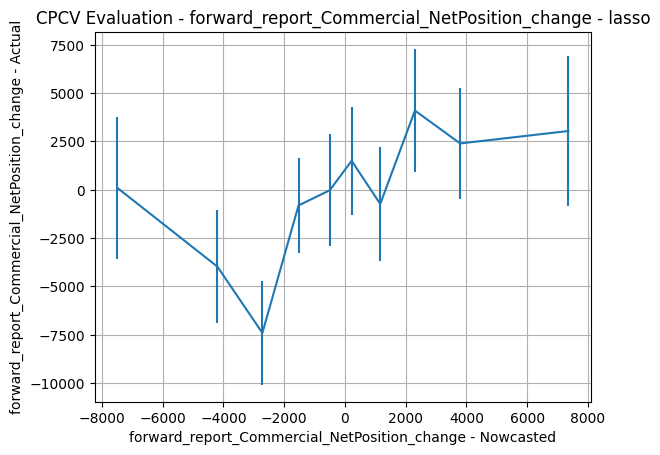

ridge: score=0.0668, params={'model': 'ridge', 'alpha': 933.6044419798662}
{'alpha': 933.6044419798662}


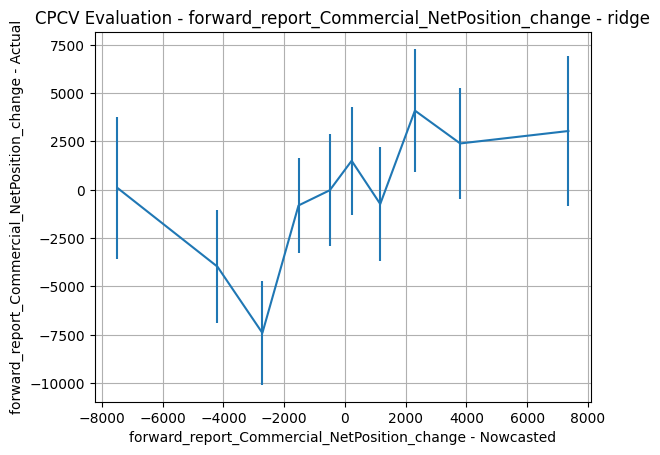

rf: score=0.0947, params={'model': 'rf', 'n_estimators': 400, 'max_depth': 8, 'min_samples_leaf': 7, 'max_features': 'log2'}
{'n_estimators': 400, 'max_depth': 8, 'min_samples_leaf': 7, 'max_features': 'log2'}


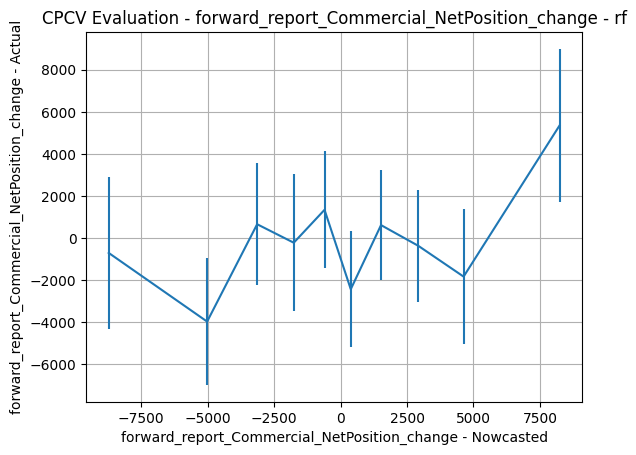

hgbm: score=0.0768, params={'model': 'hgbm', 'learning_rate': 0.0013150209380121951, 'max_depth': 3, 'max_iter': 800, 'l2_regularization': 0.997087872138611, 'max_leaf_nodes': 250}
{'learning_rate': 0.0013150209380121951, 'max_depth': 3, 'max_iter': 800, 'l2_regularization': 0.997087872138611, 'max_leaf_nodes': 250}


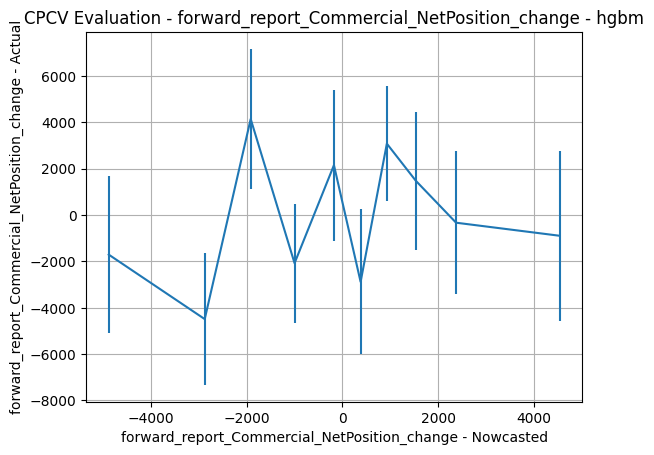

ols: score=0.0757, params={'model': 'ols'}
{}


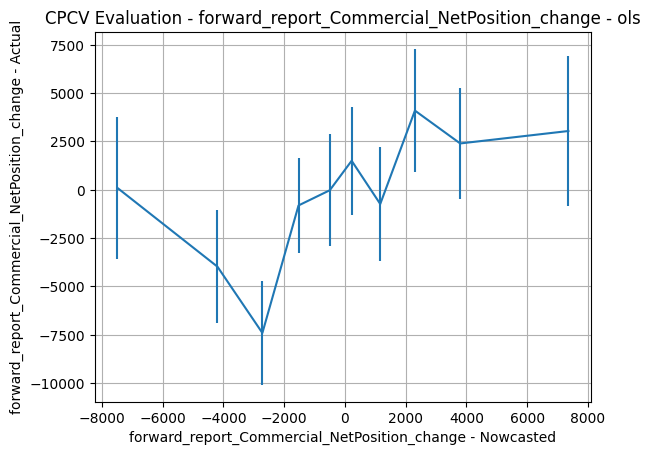

enet: score=-0.0347, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


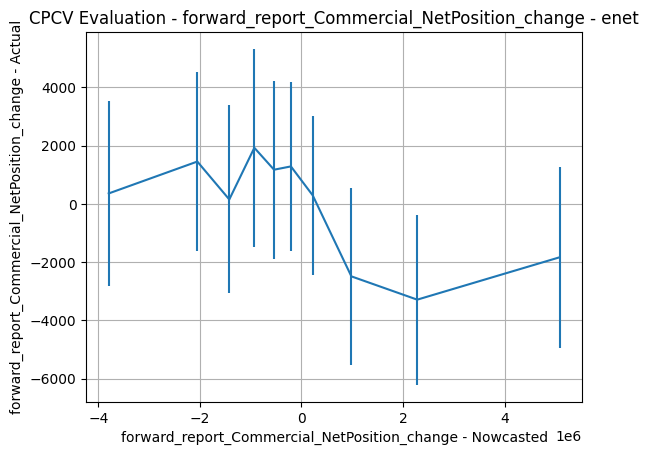

extra: score=0.0835, params={'model': 'extra', 'n_estimators': 1200, 'max_depth': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
{'n_estimators': 1200, 'max_depth': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}


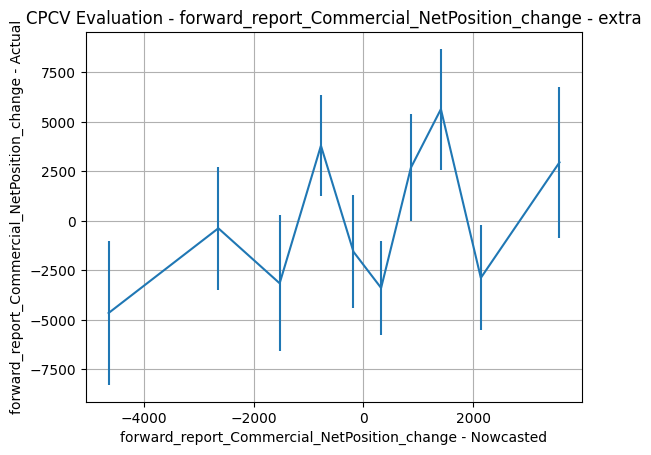

forward_report_CommercialLongPosition_change
lasso: score=0.4409, params={'model': 'lasso', 'alpha': 1.2395590952849827e-06}
{'alpha': 1.2395590952849827e-06}


/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.441e+09, tolerance: 1.084e+08
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.797e+10, tolerance: 1.035e+08
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or

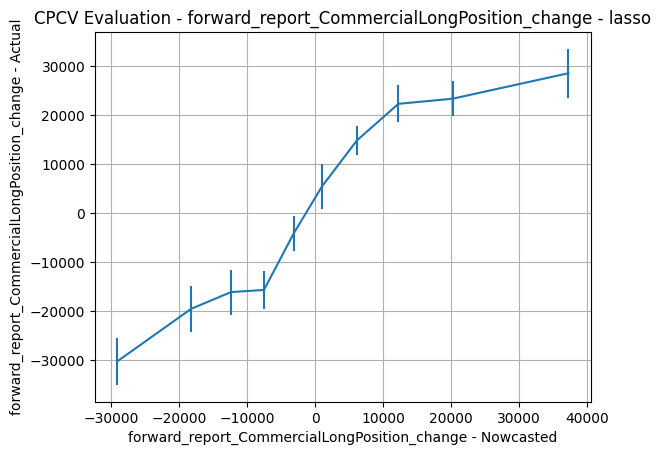

ridge: score=0.4287, params={'model': 'ridge', 'alpha': 442.5093801422389}
{'alpha': 442.5093801422389}


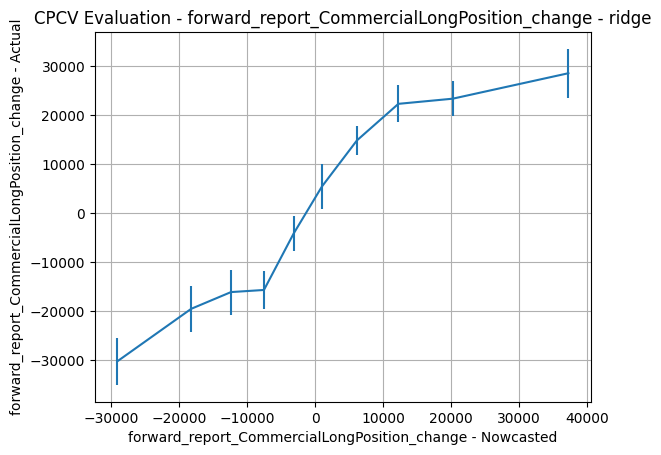

rf: score=0.4661, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 22, 'min_samples_leaf': 1, 'max_features': 'log2'}
{'n_estimators': 200, 'max_depth': 22, 'min_samples_leaf': 1, 'max_features': 'log2'}


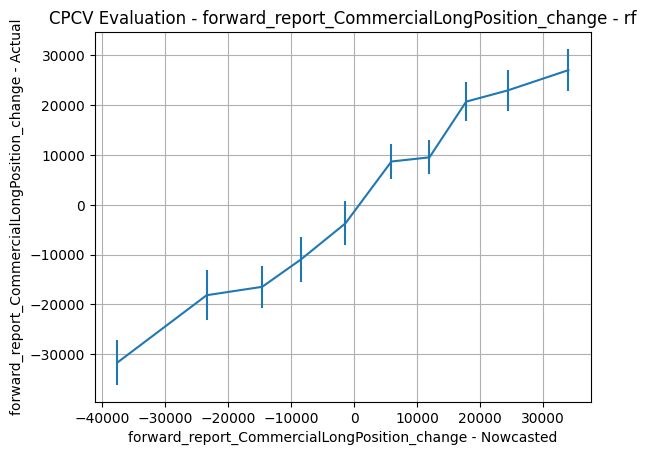

hgbm: score=0.3789, params={'model': 'hgbm', 'learning_rate': 0.28792783392692833, 'max_depth': 4, 'max_iter': 1000, 'l2_regularization': 0.6044019670197077, 'max_leaf_nodes': 241}
{'learning_rate': 0.28792783392692833, 'max_depth': 4, 'max_iter': 1000, 'l2_regularization': 0.6044019670197077, 'max_leaf_nodes': 241}


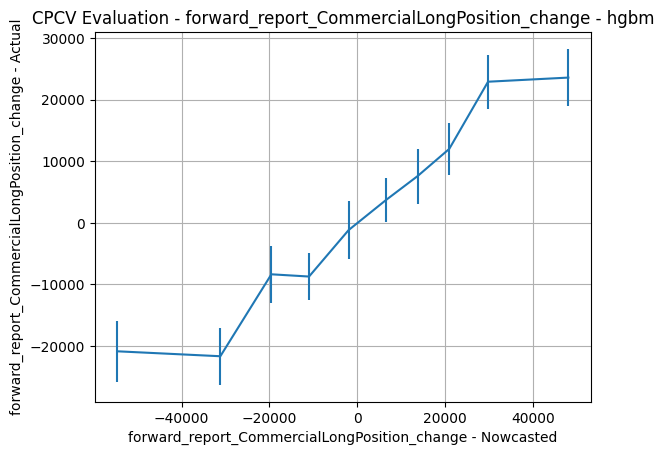

ols: score=0.4409, params={'model': 'ols'}
{}


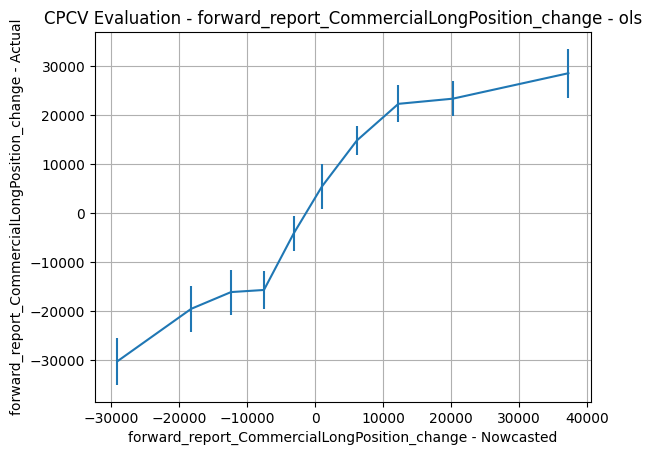

enet: score=0.3930, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


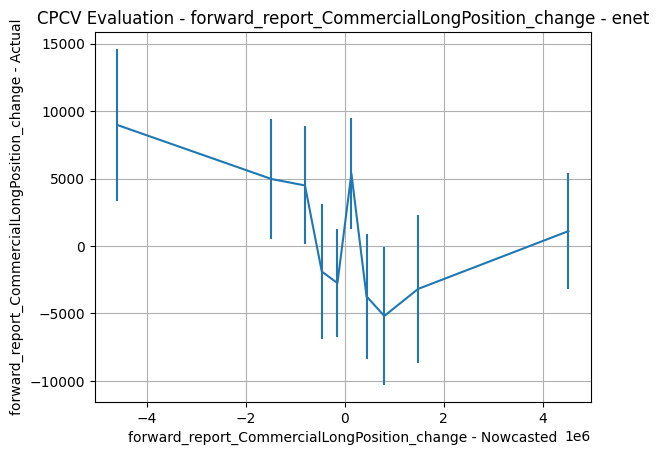

extra: score=0.4635, params={'model': 'extra', 'n_estimators': 1200, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
{'n_estimators': 1200, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


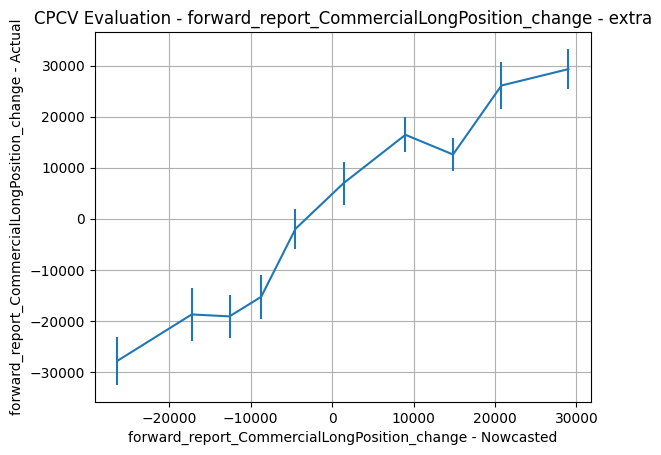

forward_report_CommercialShortPosition_change
lasso: score=0.4019, params={'model': 'lasso', 'alpha': 1.156732719914599}
{'alpha': 1.156732719914599}


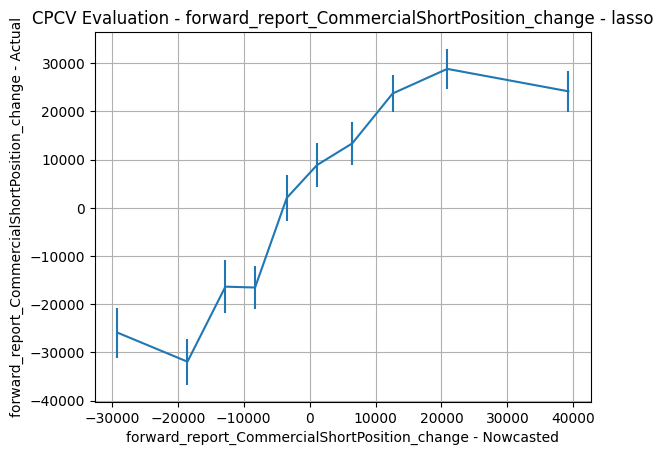

ridge: score=0.3972, params={'model': 'ridge', 'alpha': 906.6118860721004}
{'alpha': 906.6118860721004}


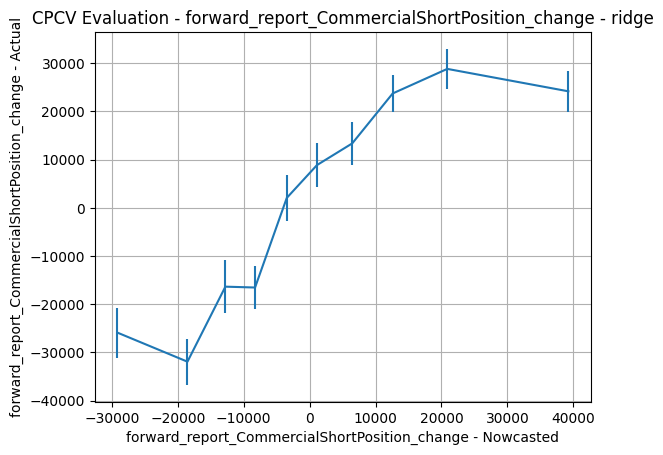

rf: score=0.4736, params={'model': 'rf', 'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 1, 'max_features': 'log2'}
{'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 1, 'max_features': 'log2'}


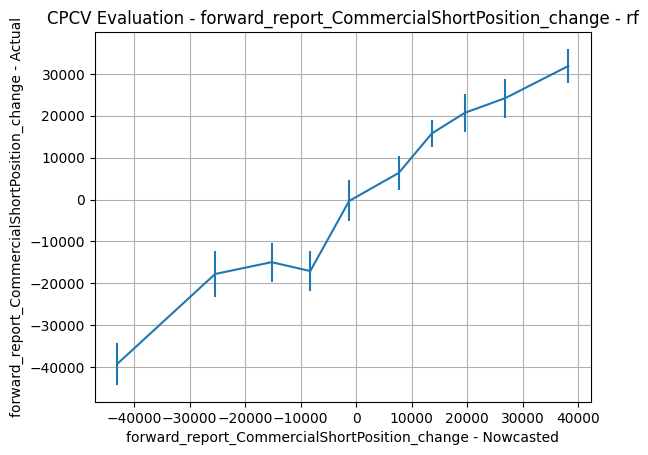

hgbm: score=0.3946, params={'model': 'hgbm', 'learning_rate': 0.25053236081220304, 'max_depth': 15, 'max_iter': 500, 'l2_regularization': 0.9997880756517733, 'max_leaf_nodes': 183}
{'learning_rate': 0.25053236081220304, 'max_depth': 15, 'max_iter': 500, 'l2_regularization': 0.9997880756517733, 'max_leaf_nodes': 183}


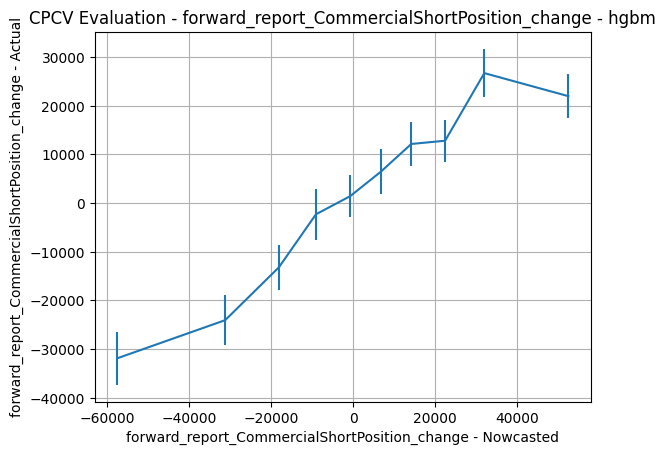

ols: score=0.4019, params={'model': 'ols'}
{}


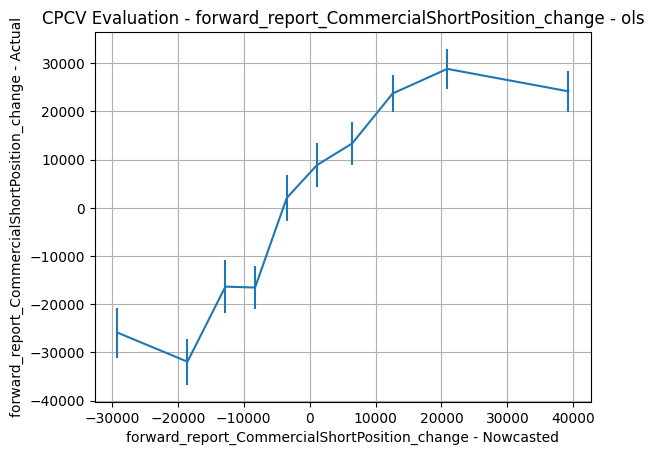

enet: score=0.3575, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


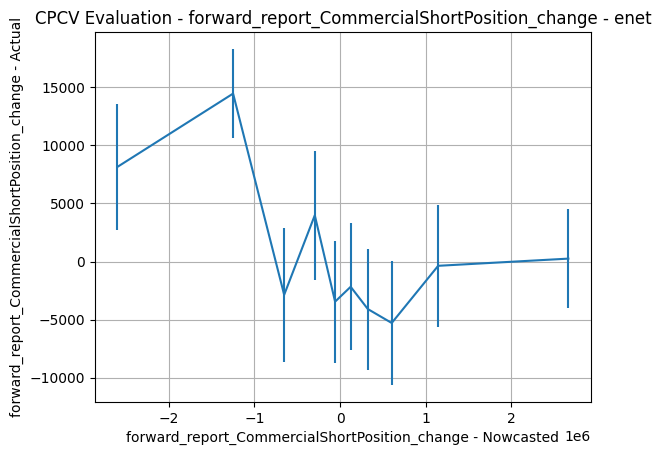

extra: score=0.4748, params={'model': 'extra', 'n_estimators': 200, 'max_depth': 19, 'min_samples_leaf': 9, 'max_features': 'log2'}
{'n_estimators': 200, 'max_depth': 19, 'min_samples_leaf': 9, 'max_features': 'log2'}


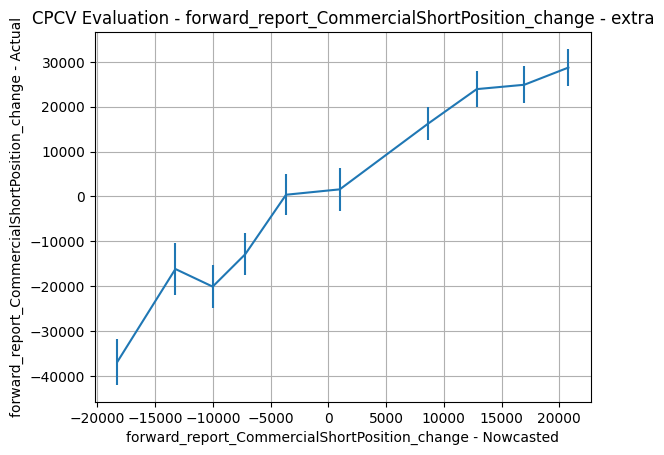

forward_Commercial_NetPosition_to_openinterest_change
lasso: score=-0.0647, params={'model': 'lasso', 'alpha': 1.156732719914599}
{'alpha': 1.156732719914599}


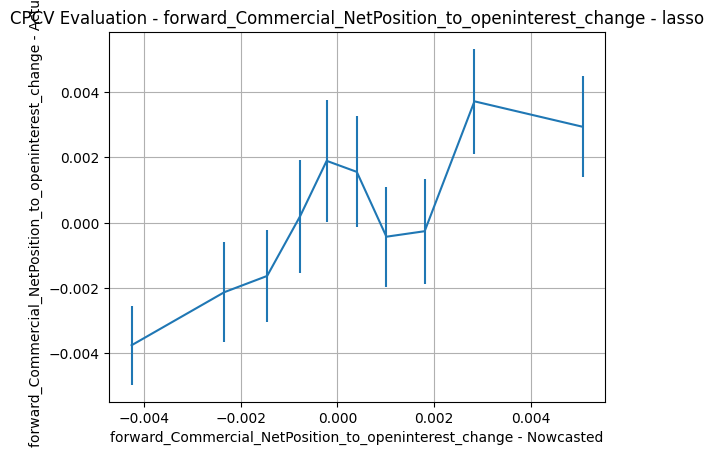

ridge: score=0.1073, params={'model': 'ridge', 'alpha': 906.6118860721004}
{'alpha': 906.6118860721004}


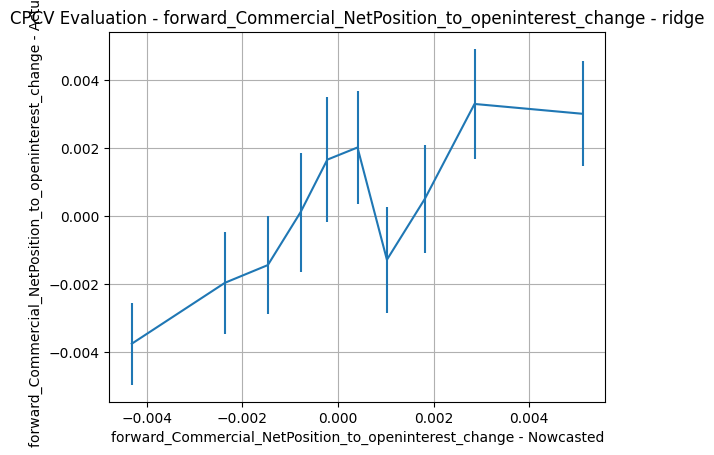

rf: score=0.1088, params={'model': 'rf', 'n_estimators': 1000, 'max_depth': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt'}
{'n_estimators': 1000, 'max_depth': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt'}


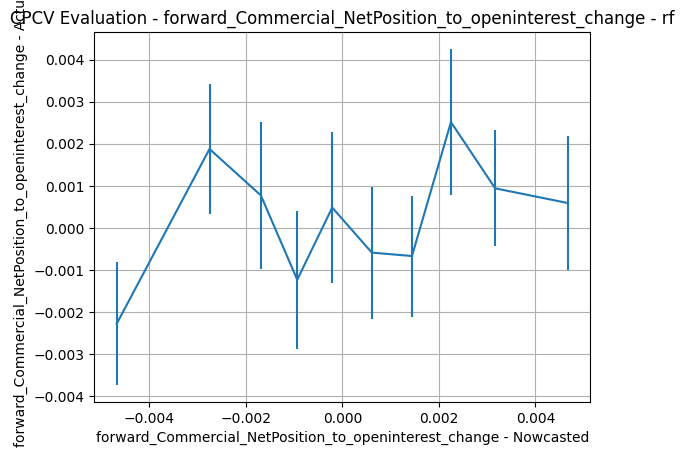

hgbm: score=0.0927, params={'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 15, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}
{'learning_rate': 0.0011976520841200263, 'max_depth': 15, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}


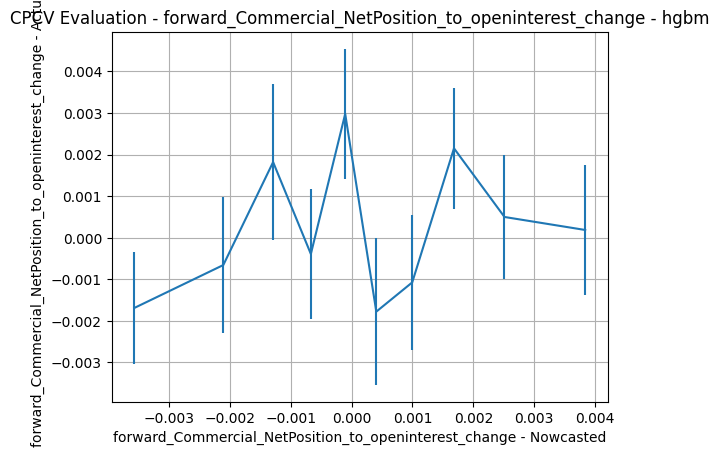

ols: score=0.1093, params={'model': 'ols'}
{}


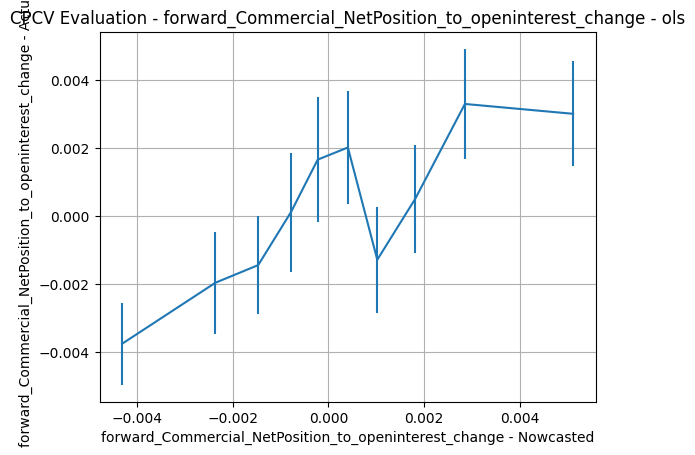

enet: score=-0.0550, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


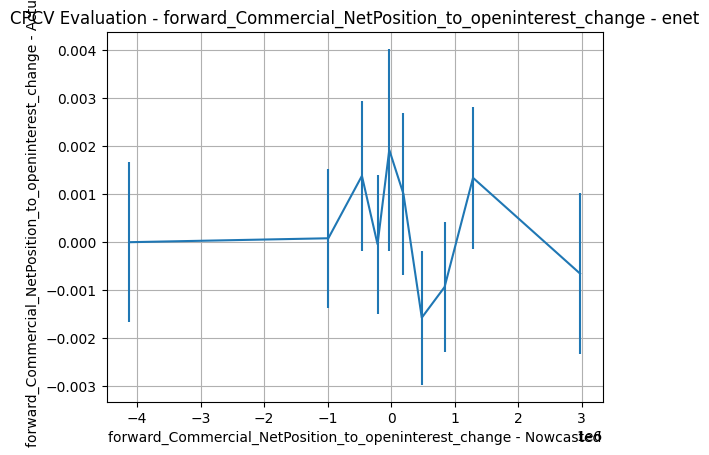

extra: score=0.1031, params={'model': 'extra', 'n_estimators': 1000, 'max_depth': 18, 'min_samples_leaf': 2, 'max_features': 'sqrt'}
{'n_estimators': 1000, 'max_depth': 18, 'min_samples_leaf': 2, 'max_features': 'sqrt'}


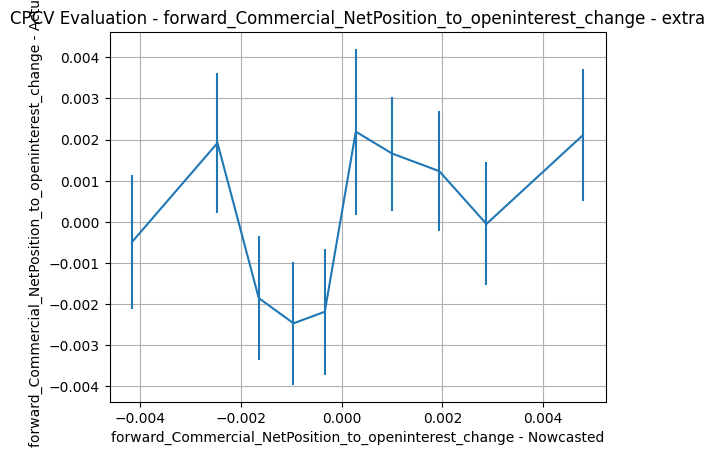

forward_CommercialLongPosition_to_openinterest_change
lasso: score=-0.0525, params={'model': 'lasso', 'alpha': 1.156732719914599}
{'alpha': 1.156732719914599}


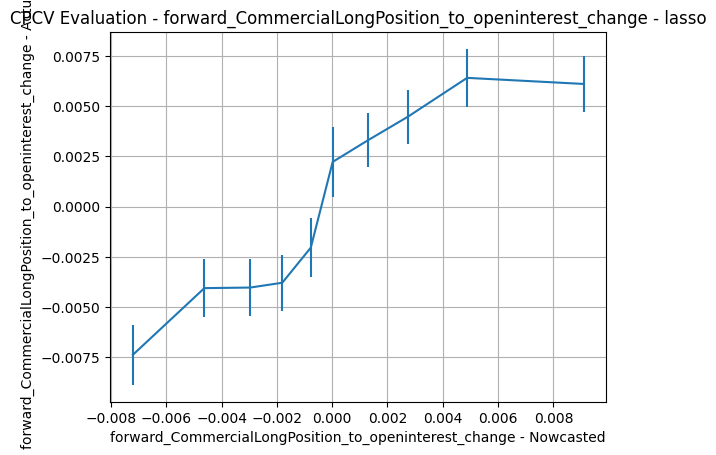

ridge: score=0.2979, params={'model': 'ridge', 'alpha': 906.6118860721004}
{'alpha': 906.6118860721004}


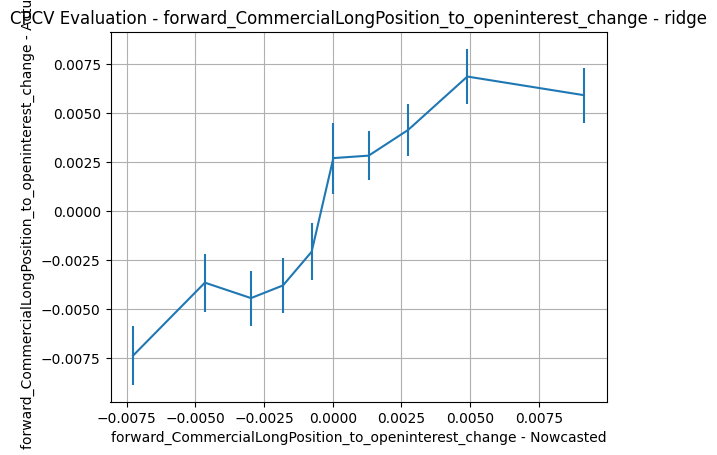

rf: score=0.2984, params={'model': 'rf', 'n_estimators': 600, 'max_depth': 26, 'min_samples_leaf': 3, 'max_features': 'log2'}
{'n_estimators': 600, 'max_depth': 26, 'min_samples_leaf': 3, 'max_features': 'log2'}


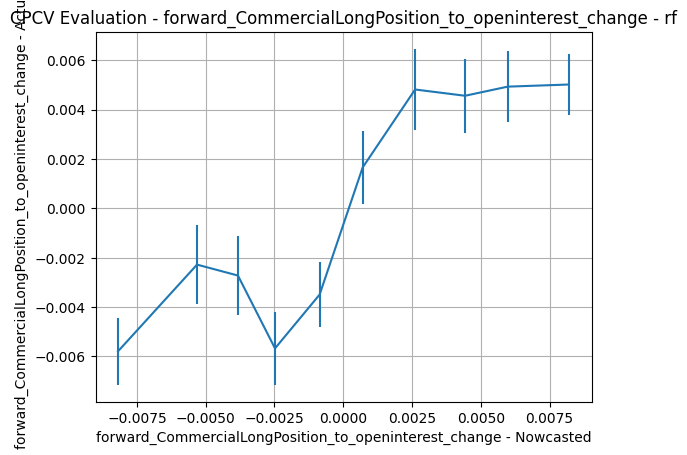

hgbm: score=0.2293, params={'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 15, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}
{'learning_rate': 0.20317617225236814, 'max_depth': 15, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}


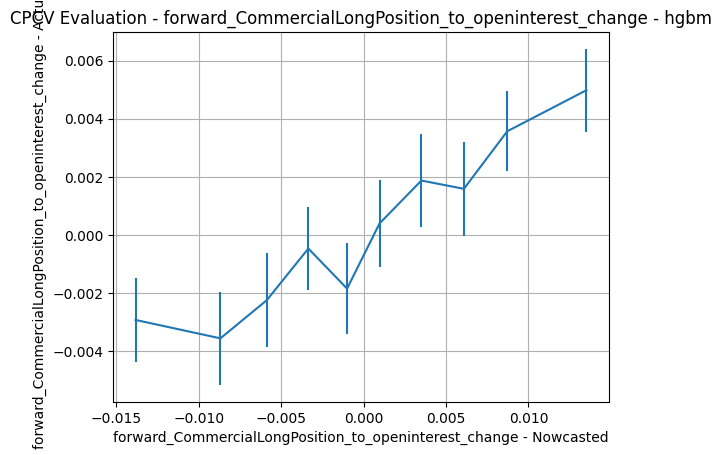

ols: score=0.2999, params={'model': 'ols'}
{}


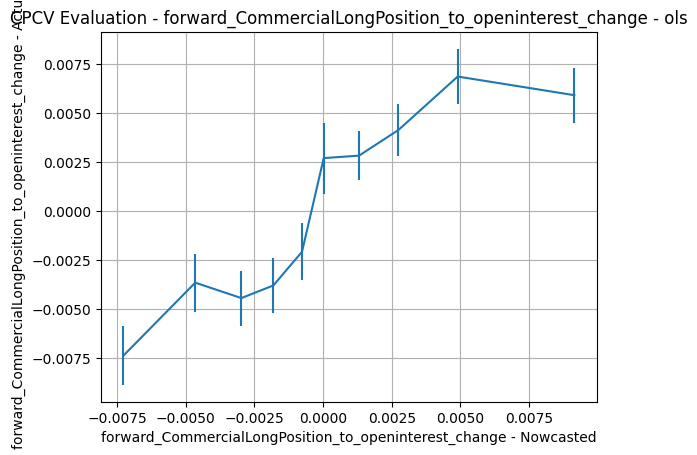

enet: score=-0.0480, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


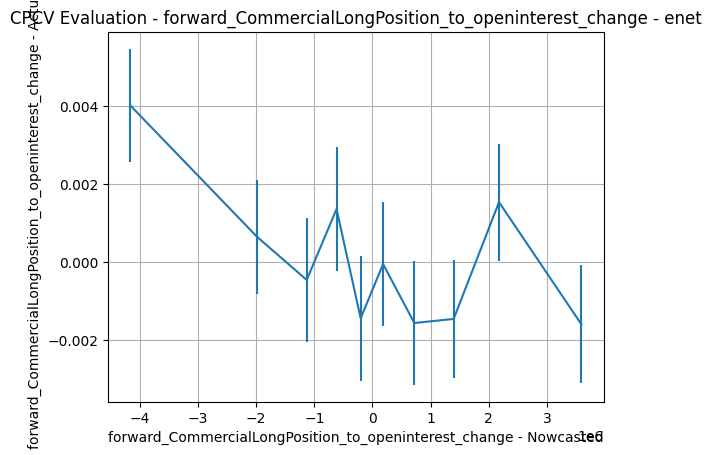

extra: score=0.2978, params={'model': 'extra', 'n_estimators': 1000, 'max_depth': 18, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
{'n_estimators': 1000, 'max_depth': 18, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


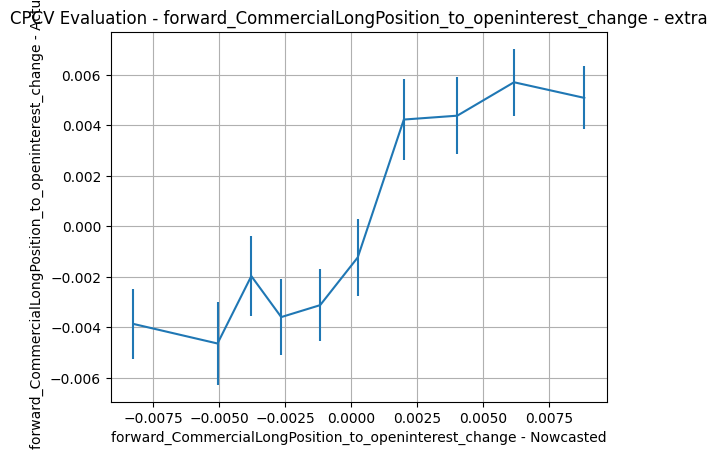

forward_CommercialShortPosition_to_openinterest_change
lasso: score=-0.0351, params={'model': 'lasso', 'alpha': 1.156732719914599}
{'alpha': 1.156732719914599}


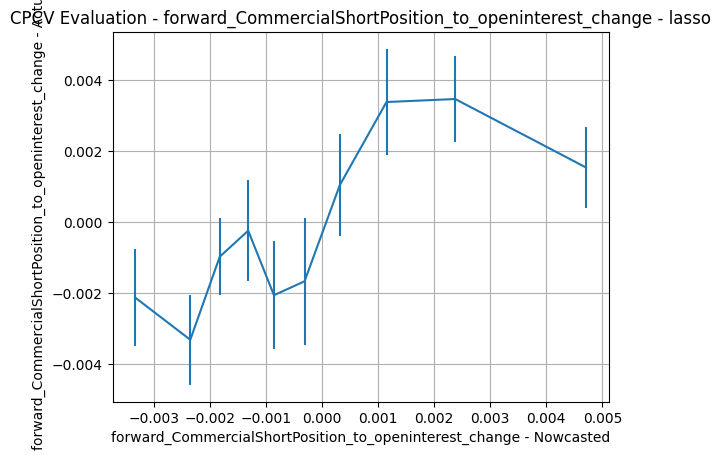

ridge: score=0.1235, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
{'alpha': 4.473429410462694e-05}


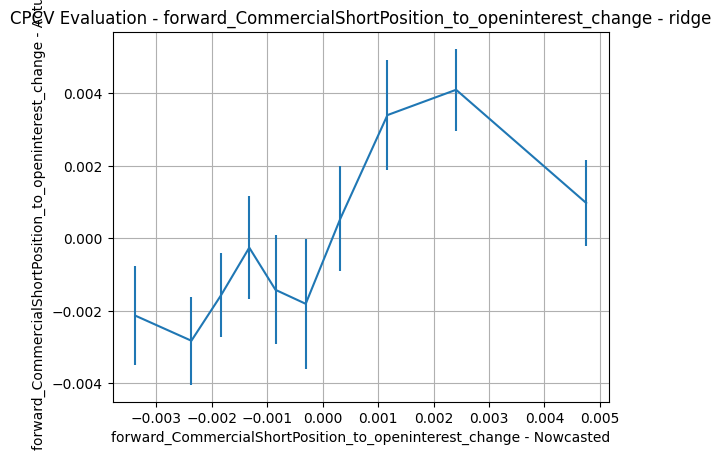

rf: score=0.1645, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 17, 'min_samples_leaf': 2, 'max_features': 'sqrt'}
{'n_estimators': 200, 'max_depth': 17, 'min_samples_leaf': 2, 'max_features': 'sqrt'}


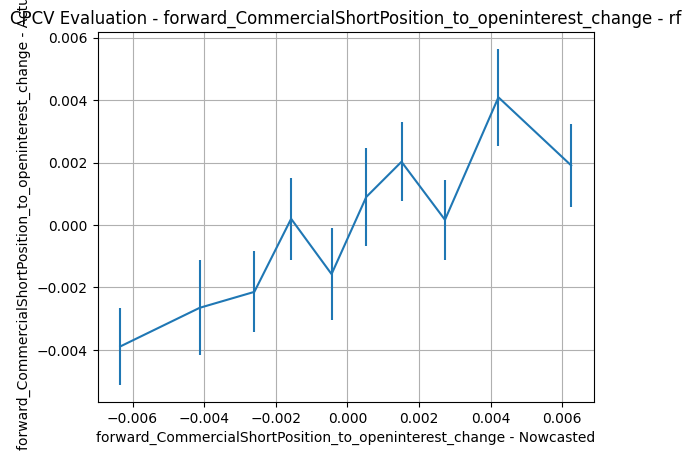

hgbm: score=0.1219, params={'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 8, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}
{'learning_rate': 0.20317617225236814, 'max_depth': 8, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}


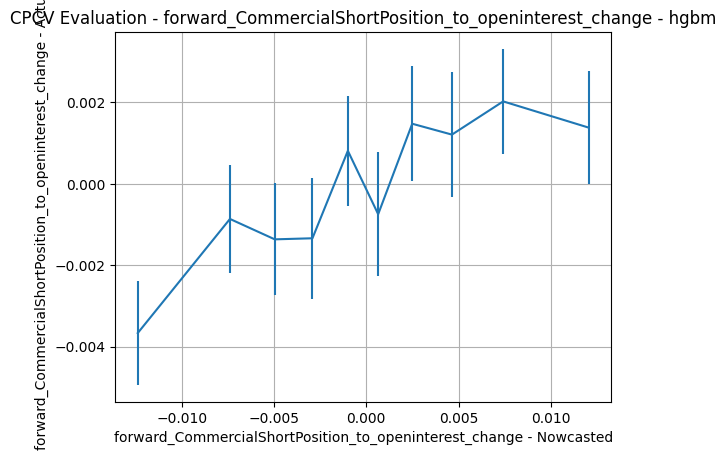

ols: score=0.1235, params={'model': 'ols'}
{}


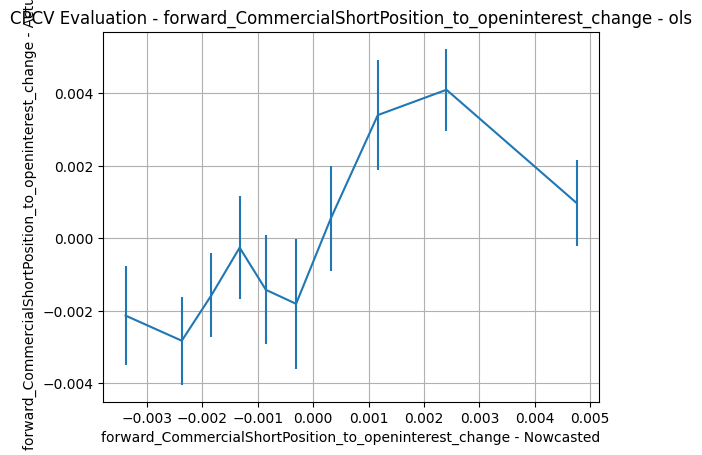

enet: score=-0.0314, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


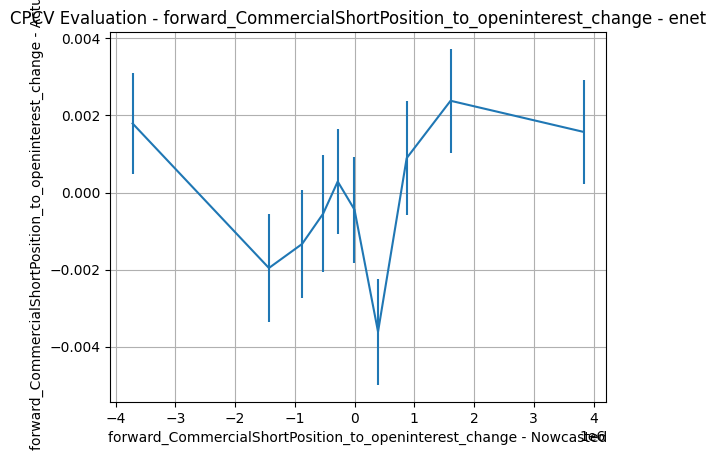

extra: score=0.1686, params={'model': 'extra', 'n_estimators': 800, 'max_depth': 25, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
{'n_estimators': 800, 'max_depth': 25, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


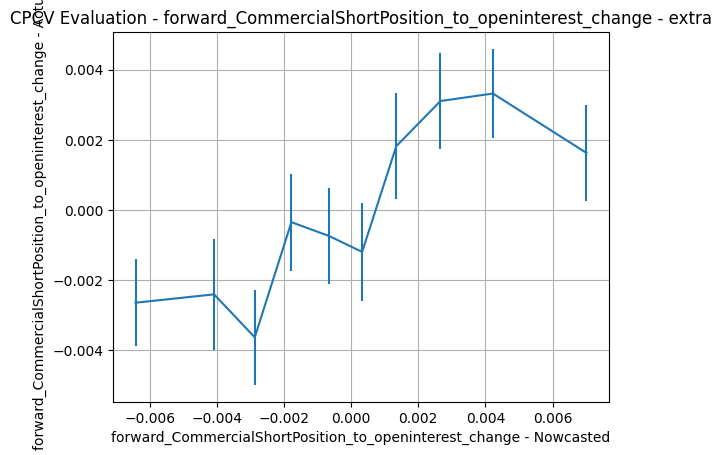

In [36]:
response_performance_map = {}
for response_name , best_model in responses_best_model.items():
    print(response_name)
    best_per_model = responses_best_per_model[response_name]
    response_performance_trail = {}
    for model_name, info in best_per_model.items():
        print(f"{model_name}: score={info['score']:.4f}, params={info['params']}")
        params = copy.deepcopy(info['params'])
        del params['model']
        print(params)
        # estimator = estimators_[model_name.lower()](**params) 

        if model_name == "enet": 
            estimator = SGDRegressor(**params)
        elif model_name == "lasso": 
            estimator = Lasso(**params)
        elif model_name == "ols": 
            estimator = LinearRegression()
        elif model_name == "ridge": 
            estimator = Ridge(**params)
        elif  model_name == "rf": 
            estimator = RandomForestRegressor(**params)
        elif model_name == "extra":
            estimator = ExtraTreesRegressor(**params)
        elif model_name == "hgbm":
            estimator = HistGradientBoostingRegressor(**params)
        

        Xy = dataset[['tradeDate']+feature_names+[response_name]].dropna()
        Xy.reset_index(drop=True, inplace= True)
        yhat = cpcv_predict( estimator ,
                             Xy[feature_names],
                             Xy[response_name],
                             cv=cv,
                                method = 'predict',
                                n_jobs=10)
        response_performance_trail[model_name] = np.corrcoef(yhat,  Xy[response_name])[0,1]
        _=plot_bin_summary_of_xy(
                    x = yhat,
                    y = Xy[response_name],
                    k= 10 )
        plt.xlabel(f'{response_name} - Nowcasted')
        plt.ylabel(f'{response_name} - Actual')
        plt.grid()
        plt.title(f'CPCV Evaluation - {response_name} - {model_name}')
        plt.show()
        plt.close()
    response_performance_map[response_name] = response_performance_trail
        
        

In [37]:
pd.DataFrame(response_performance_map).T

,lasso,ridge,rf,hgbm,ols,enet,extra
forward_report_Commercial_NetPosition_change,0.079819,0.079819,0.046062,0.024733,0.079819,-0.048609,0.048991
forward_report_CommercialLongPosition_change,0.440852,0.440852,0.465538,0.378893,0.440852,-0.036097,0.463131
forward_report_CommercialShortPosition_change,0.406153,0.406153,0.478894,0.398431,0.406153,-0.047921,0.471038
forward_Commercial_NetPosition_to_openinterest_change,0.127733,0.126415,0.034784,0.025926,0.126415,-0.045730,0.049618
forward_CommercialLongPosition_to_openinterest_change,0.317843,0.317460,0.292887,0.190396,0.317460,-0.071620,0.271502
forward_CommercialShortPosition_to_openinterest_change,0.124992,0.123516,0.168052,0.121919,0.123516,0.037328,0.164605


In [38]:
final_selected_model_per_response = dict(pd.DataFrame(response_performance_map).T.idxmax(axis=1))

In [39]:
final_selected_model_and_parameters_per_response = {}
for response_name , best_model_params in responses_best_per_model.items():
    print(response_name)
    best_model_name = final_selected_model_per_response[response_name]
    best_model_params = copy.deepcopy(best_model_params[best_model_name]['params'])
    del best_model_params['model']
    print(best_model_params)
    final_selected_model_and_parameters_per_response[response_name] = {
                    'model_name' : best_model_name, 
                    'params': best_model_params
        
    }
    

forward_report_Commercial_NetPosition_change
{'alpha': 933.6044419798662}
forward_report_CommercialLongPosition_change
{'n_estimators': 200, 'max_depth': 22, 'min_samples_leaf': 1, 'max_features': 'log2'}
forward_report_CommercialShortPosition_change
{'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 1, 'max_features': 'log2'}
forward_Commercial_NetPosition_to_openinterest_change
{'alpha': 1.156732719914599}
forward_CommercialLongPosition_to_openinterest_change
{'alpha': 1.156732719914599}
forward_CommercialShortPosition_to_openinterest_change
{'n_estimators': 200, 'max_depth': 17, 'min_samples_leaf': 2, 'max_features': 'sqrt'}


In [40]:
final_selected_model_and_parameters_per_response

{'forward_report_Commercial_NetPosition_change': {'model_name': 'ridge',
  'params': {'alpha': 933.6044419798662}},
 'forward_report_CommercialLongPosition_change': {'model_name': 'rf',
  'params': {'n_estimators': 200,
   'max_depth': 22,
   'min_samples_leaf': 1,
   'max_features': 'log2'}},
 'forward_report_CommercialShortPosition_change': {'model_name': 'rf',
  'params': {'n_estimators': 1000,
   'max_depth': 12,
   'min_samples_leaf': 1,
   'max_features': 'log2'}},
 'forward_Commercial_NetPosition_to_openinterest_change': {'model_name': 'lasso',
  'params': {'alpha': 1.156732719914599}},
 'forward_CommercialLongPosition_to_openinterest_change': {'model_name': 'lasso',
  'params': {'alpha': 1.156732719914599}},
 'forward_CommercialShortPosition_to_openinterest_change': {'model_name': 'rf',
  'params': {'n_estimators': 200,
   'max_depth': 17,
   'min_samples_leaf': 2,
   'max_features': 'sqrt'}}}

In [41]:
import json
with open("br_cot_comm_forecast_selected_model_by_response.json", "w") as f:
    json.dump(final_selected_model_and_parameters_per_response, f)